## Topic : Lead Scoring Case Study

**Problem Statement:**
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

**Content**
- Prospect ID: A unique ID with which the customer is identified.
- Lead Number: A lead number assigned to each lead procured.
- Lead Origin: The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
- Lead Source: The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
- Do Not Email: An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
- Do Not Call: An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
- Converted	The target variable: Indicates whether a lead has been successfully converted or not.
- TotalVisits: The total number of visits made by the customer on the website.
- Total Time Spent on Website: The total time spent by the customer on the website.
- Page Views Per Visit: Average number of pages on the website viewed during the visits.
- Last Activity: Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
- Country: The country of the customer.
- Specialization: The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
- How did you hear about X Education: The source from which the customer heard about X Education.
- What is your current occupation: Indicates whether the customer is a student, umemployed or employed.
- What matters most to you in choosing this course: An option selected by the customer indicating what is their main motto behind doing this course.
- Search: Indicating whether the customer had seen the ad in any of the listed items.
    - Magazine	
    - Newspaper Article
    - X Education Forums	
    - Newspaper	
    - Digital Advertisement	
    - Through Recommendations: Indicates whether the customer came in through recommendations.
- Receive More Updates About Our Courses: Indicates whether the customer chose to receive more updates about the courses.
- Tags: Tags assigned to customers indicating the current status of the lead.
- Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
- Update me on Supply Chain Content: Indicates whether the customer wants updates on the Supply Chain Content.
- Get updates on DM Content: Indicates whether the customer wants updates on the DM Content.
- Lead Profile: A lead level assigned to each customer based on their profile.
- City: The city of the customer.
- Asymmetrique Activity Index: An index and score assigned to each customer based on their activity and their profile.
- Asymmetrique Profile Index: An index and score assigned to each customer based on their activity and their profile
- Asymmetrique Activity Score: An index and score assigned to each customer based on their activity and their profile
- Asymmetrique Profile Score: An index and score assigned to each customer based on their activity and their profile
- I agree to pay the amount through cheque: Indicates whether the customer has agreed to pay the amount through cheque or not.
- a free copy of Mastering The Interview: Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
- Last Notable Activity: The last notable acitivity performed by the student.

**Goals of the case study**
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
   
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

**The steps are broadly:**
1. Read and understand the data.
2. Clean the data.
3. Data visualization and understanding.
4. Regression Analysis.
5. Lead Score
6. Addressing potential problems.
7. Summary and Findings.

## Step 1: Reading and Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import io

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("Leads.csv")

In [4]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
df.shape

(9240, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [8]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Step 2: Data Cleaning

In [9]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
df.nunique().tolist()

[9240,
 9240,
 5,
 21,
 2,
 2,
 2,
 41,
 1731,
 114,
 17,
 38,
 19,
 10,
 6,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 26,
 5,
 1,
 1,
 6,
 7,
 3,
 3,
 12,
 10,
 1,
 2,
 16]

In [11]:
## checking count of unique values in each column
for i in df.columns:
    print(df[i].value_counts())

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
446a290f-b78f-413b-8912-d9c79a847e3a    1
38826741-ffe2-4d37-89c4-1140c66c5560    1
f08604ae-a2fa-4d64-8a42-a95ff2bddfed    1
ce9c2fa0-d2ff-493d-82a9-20c81b175b3e    1
13e3716d-528a-4e90-a441-51ab1d0184d1    1
0047124c-2a76-4c2d-b4e4-83cb2331dbec    1
9608eda6-d8bb-45ec-ab12-eb3c49d52b0f    1
07a52472-4b5d-446f-9048-ffdc7bc65e96    1
804e0cfb-559d-4a63-a635-573f7cfdf441    1
65954c34-8ce7-4d9b-8ae0-f15f15bc9055    1
e02efa11-5bf6-40ee-9194-75d3fffef1d3    1
297fd0fa-69e5-49cf-b794-94c103e388d7    1
f4217ab4-81fd-42d9-a9b4-f8bbfaf1578b    1
b3af7901-09d8-49b7-803f-1cd1e1e8878a    1
7bcca8a9-60ab-4a36-a7f9-cd85aeb10a70    1
13931a86-7053-4522-af99-9e6ae1a6e9b8    1
a303766c-f688-4908-bda8-5fc6d8a35bb8    1
10d4109f-eaa0-42a2-887e-6e0f5d83af44    1
321a15ce-0a20-4d9c-8bf

In [12]:
## Dropping the extra columns & columns with more then which will not impact analysis
cols_to_drop = ["Prospect ID", "Do Not Email", "Do Not Call", "A free copy of Mastering The Interview", "I agree to pay the amount through cheque", "Last Notable Activity","Update me on Supply Chain Content"]

In [13]:
df = df.drop(columns=cols_to_drop)

In [14]:
df.shape

(9240, 30)

In [15]:
df.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                   Select   
1             Email Opened   India                   Select   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

   Asymmetrique Activity Score  Asymmetrique 

In [16]:
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [17]:
dtypes = df.dtypes
dtypes

Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                      

In [18]:
## Segregating columns in categorical and numerical columns:

cat_cols=[]    # categorical columns
num_cols=[]   # numeric columns
for col, dtype in dtypes.items():
    if dtype == 'object':  # categorical columns have 'object' data type
        cat_cols.append(col)
    elif dtype in ['int64', 'float64']:  # numerical columns have 'int64' or 'float64' data type
        num_cols.append(col)

In [19]:
print(cat_cols)

['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']


In [20]:
print(num_cols)

['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [21]:
df[cat_cols].shape

(9240, 23)

In [22]:
df[num_cols].shape

(9240, 7)

**Handling missing values in Numerical columns**

In [23]:
df[num_cols].isnull().sum()

Lead Number                       0
Converted                         0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Asymmetrique Activity Score    4218
Asymmetrique Profile Score     4218
dtype: int64

In [24]:
df[num_cols].describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [25]:
## Imputing missing values in numerical columns with mean
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [26]:
df[num_cols].isnull().sum()

Lead Number                    0
Converted                      0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Asymmetrique Activity Score    0
Asymmetrique Profile Score     0
dtype: int64

In [27]:
df["TotalVisits"] = df["TotalVisits"].round(2)
df["Total Time Spent on Website"] = df["Total Time Spent on Website"].round(2)
df["Page Views Per Visit"] = df["Page Views Per Visit"].round(2)
df["Asymmetrique Activity Score"] = df["Asymmetrique Activity Score"].round(2)
df["Asymmetrique Profile Score"] = df["Asymmetrique Profile Score"].round(2)

**Handling missing values in Categorical columns**

In [28]:
df[cat_cols].isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Tags                                             3353
Lead Quality                                     4767
Get updates on DM Content   

In [29]:
df["Specialization"].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [30]:
df["How did you hear about X Education"].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [31]:
df["Lead Profile"].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [32]:
df["City"].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [33]:
## Imputing missing values in ["Country", "Specialization", "City",] with mode

# replace missing values and "Select" with NaN
df['Specialization'] = df['Specialization'].replace({'Select': np.nan})
df['Country'] = df['Country'].replace({'unknown': np.nan})
df['City'] = df['City'].replace({'Select': np.nan})

# replace NaN with mode
df['Specialization'] = df['Specialization'].fillna(df['Specialization'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])

## replace NaN with mode
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])

In [34]:
df[cat_cols].isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Last Activity                                     103
Country                                             0
Specialization                                      0
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Tags                                             3353
Lead Quality                                     4767
Get updates on DM Content   

In [35]:
# replace missing values and "Select" with NaN
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace({'Select': np.nan})
df['Lead Profile'] = df['Lead Profile'].replace({'Select': np.nan})

In [36]:
## Replace missing values of below columns with a specific value i.e., "Unknown"
df['Lead Source'].fillna('Unknown', inplace=True)
df['Last Activity'].fillna('Unknown', inplace=True)

## Replace missing values of below columns with a specific value i.e., "other"
df['How did you hear about X Education'].fillna('Other', inplace=True)
df['What is your current occupation'].fillna('Other', inplace=True)
df['What matters most to you in choosing a course'].fillna('Other', inplace=True)

## Replace missing values of below columns with a specific value i.e., "Not Defined"
df['Tags'].fillna('Not Defined', inplace=True)
df['Lead Quality'].fillna('Not Defined', inplace=True)
df['Lead Profile'].fillna('Not Defined', inplace=True)
df['Asymmetrique Activity Index'].fillna('Not Defined', inplace=True)
df['Asymmetrique Profile Index'].fillna('Not Defined', inplace=True)

In [37]:
df['Asymmetrique Profile Index'].unique()

array(['02.Medium', '01.High', '03.Low', 'Not Defined'], dtype=object)

In [38]:
df.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [39]:
df.shape

(9240, 30)

In [40]:
df.dtypes

Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                      

## Step 3: Data Visualization and Understanding

In [41]:
print(num_cols)

['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [42]:
print(cat_cols)

['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']


**Visualizing numerical columns using vilonplot**

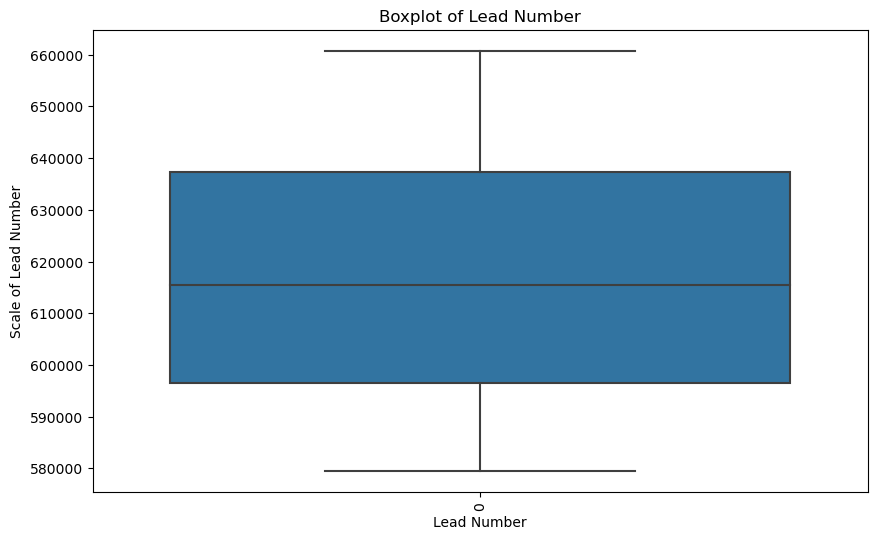

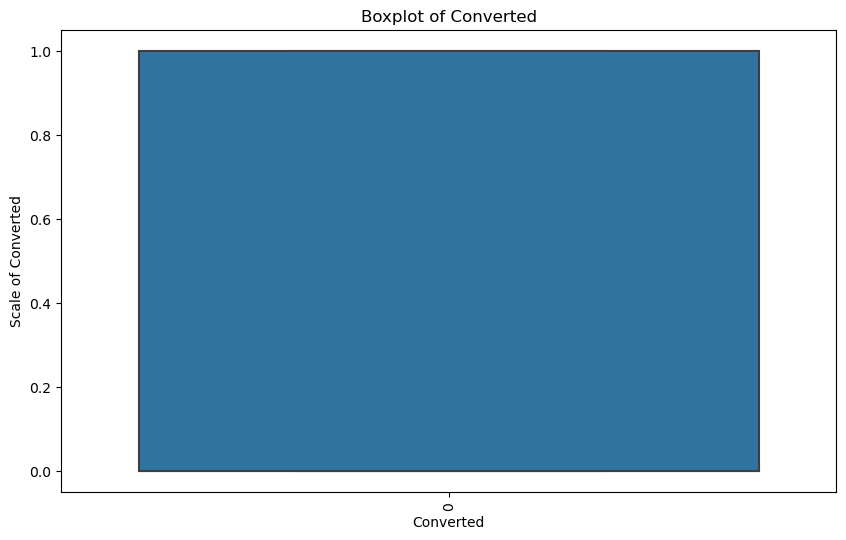

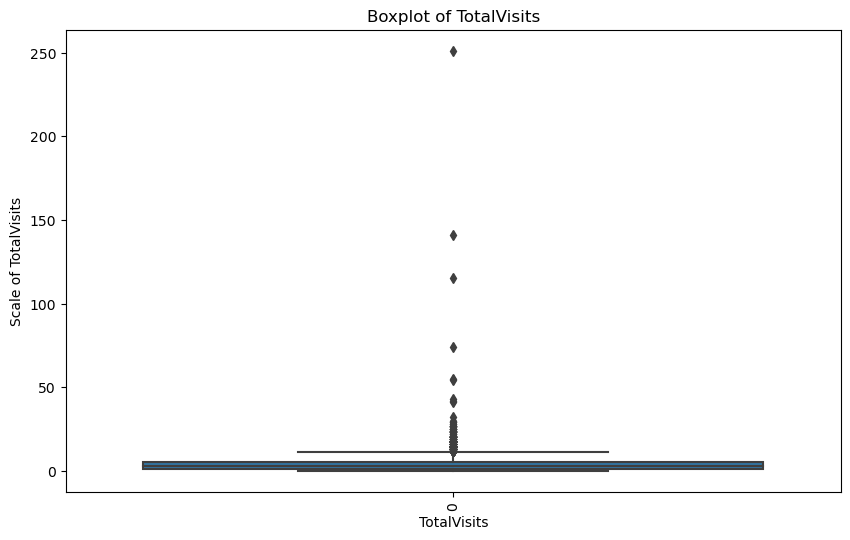

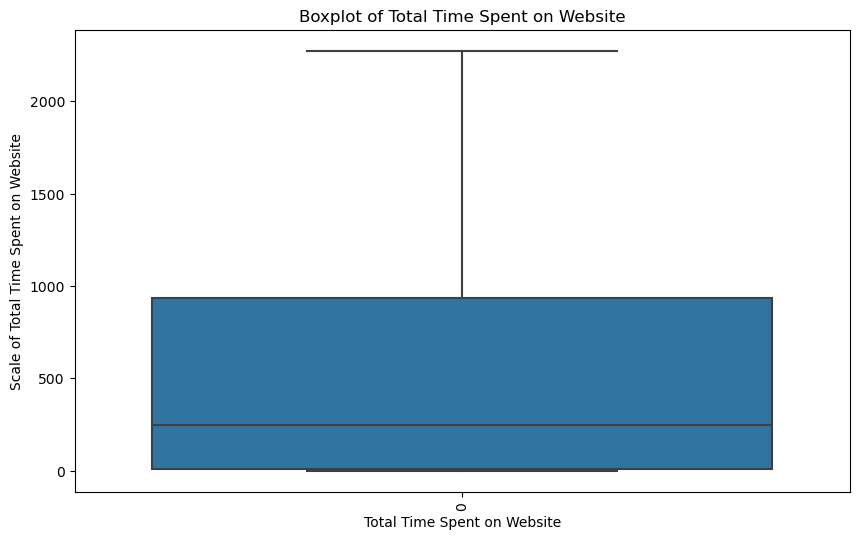

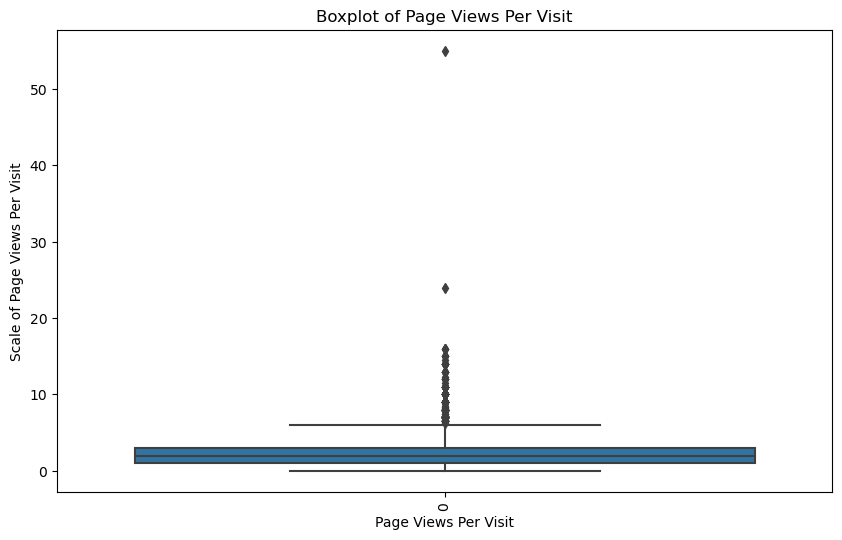

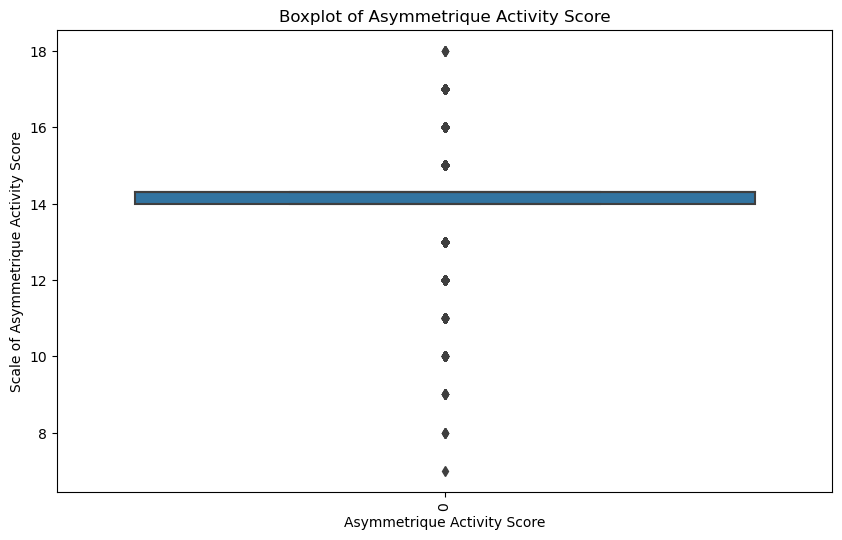

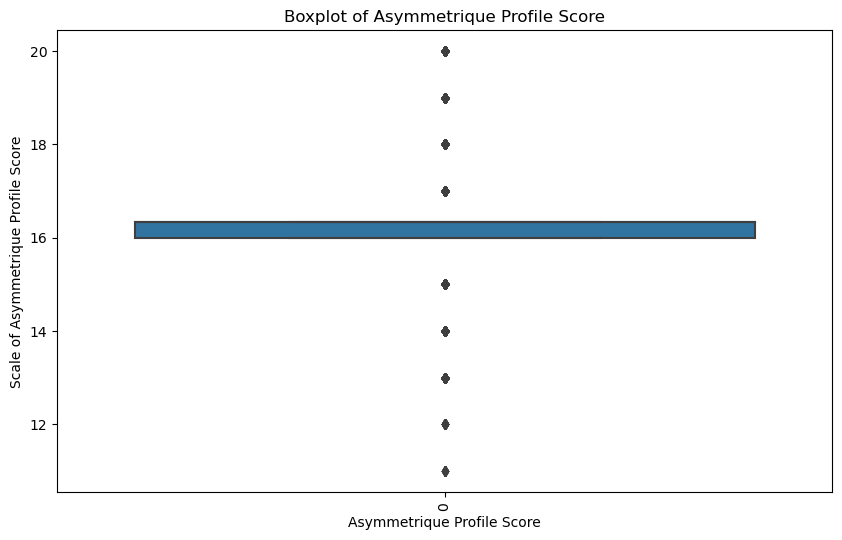

In [43]:
for col in num_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Scale of {col}')
    plt.xticks(rotation=90)
    plt.show()

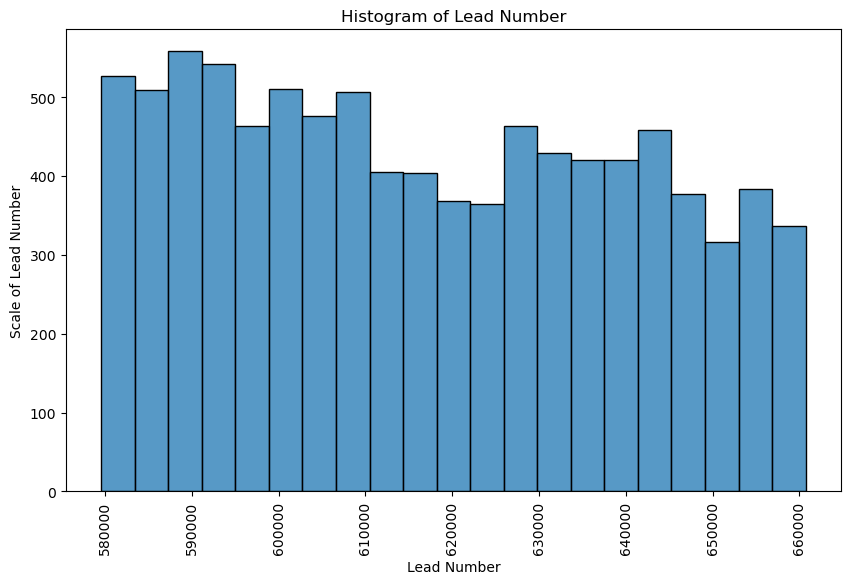

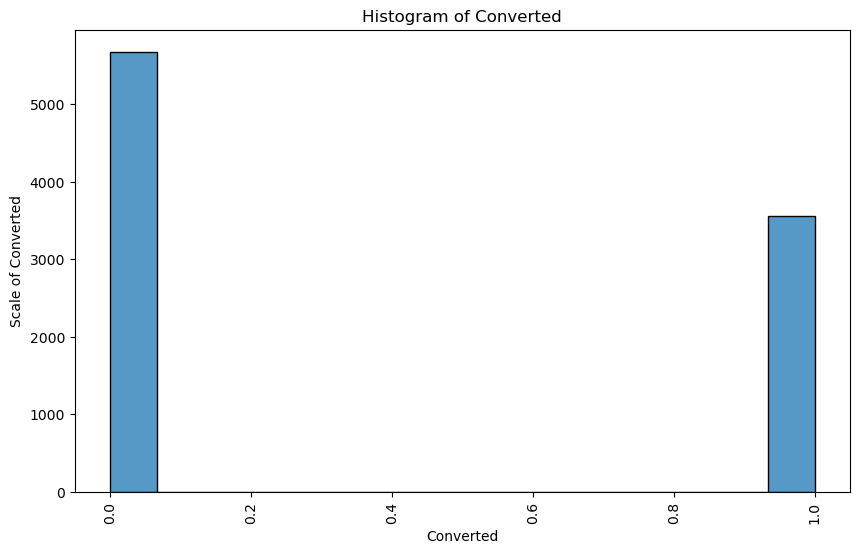

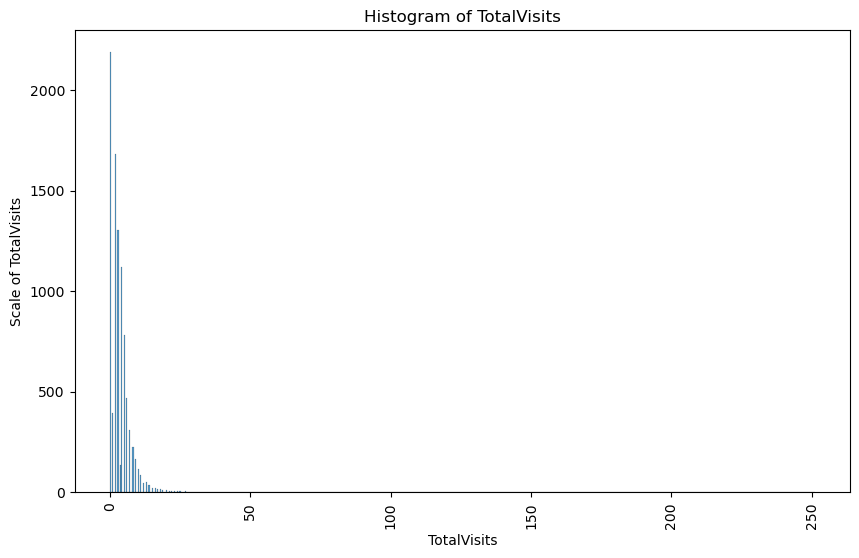

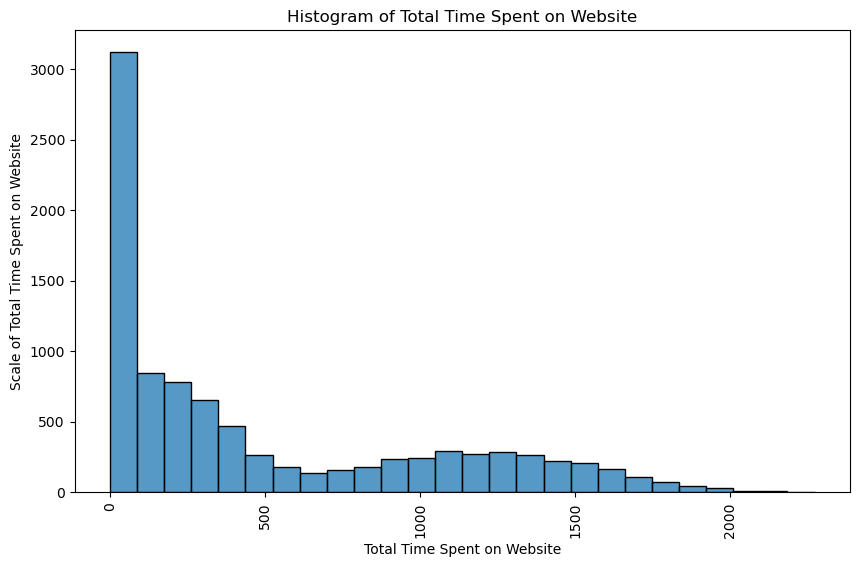

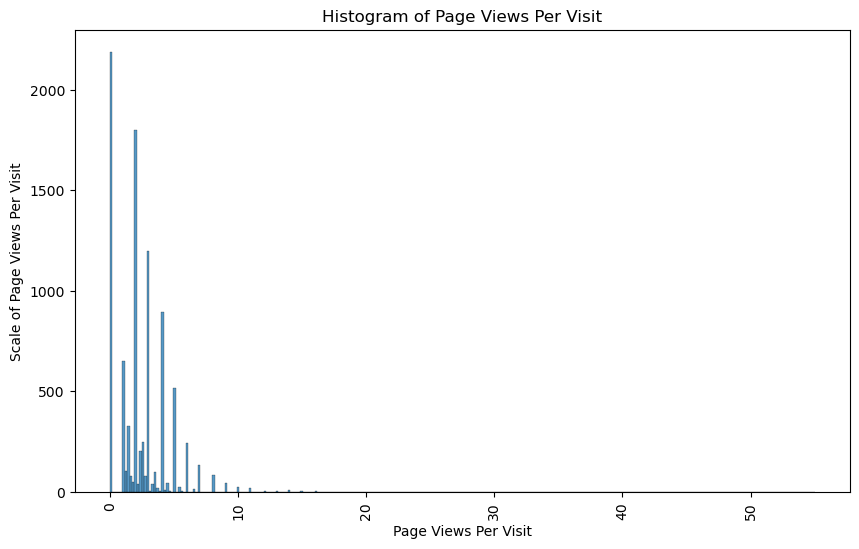

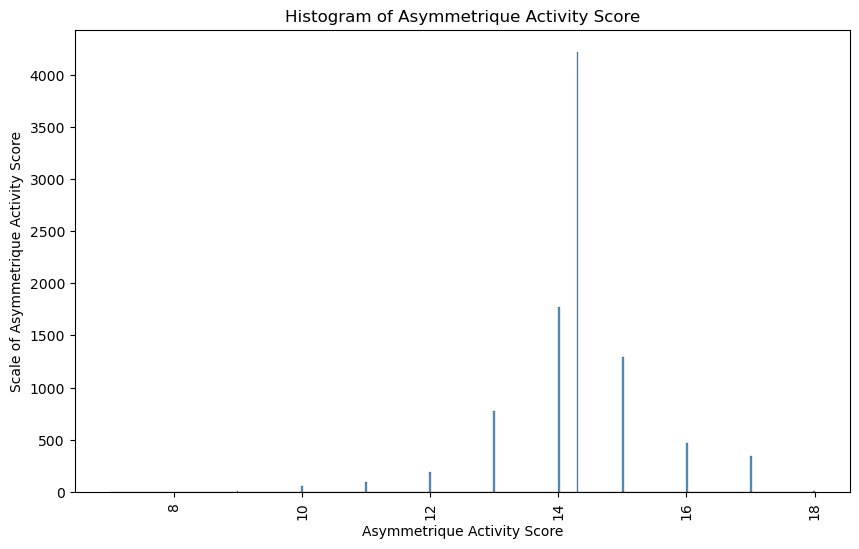

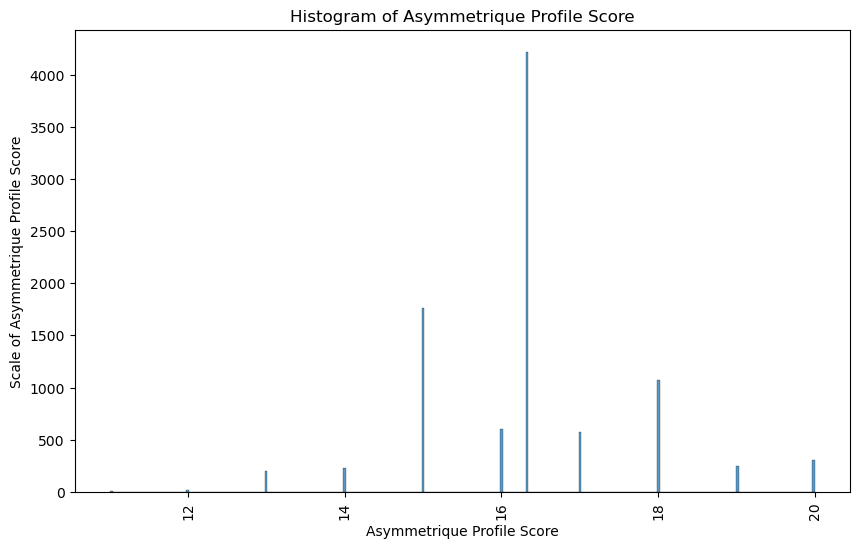

In [44]:
for col in num_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Scale of {col}')
    plt.xticks(rotation=90)
    plt.show()

**Visualizing numerical columns using pairplot**

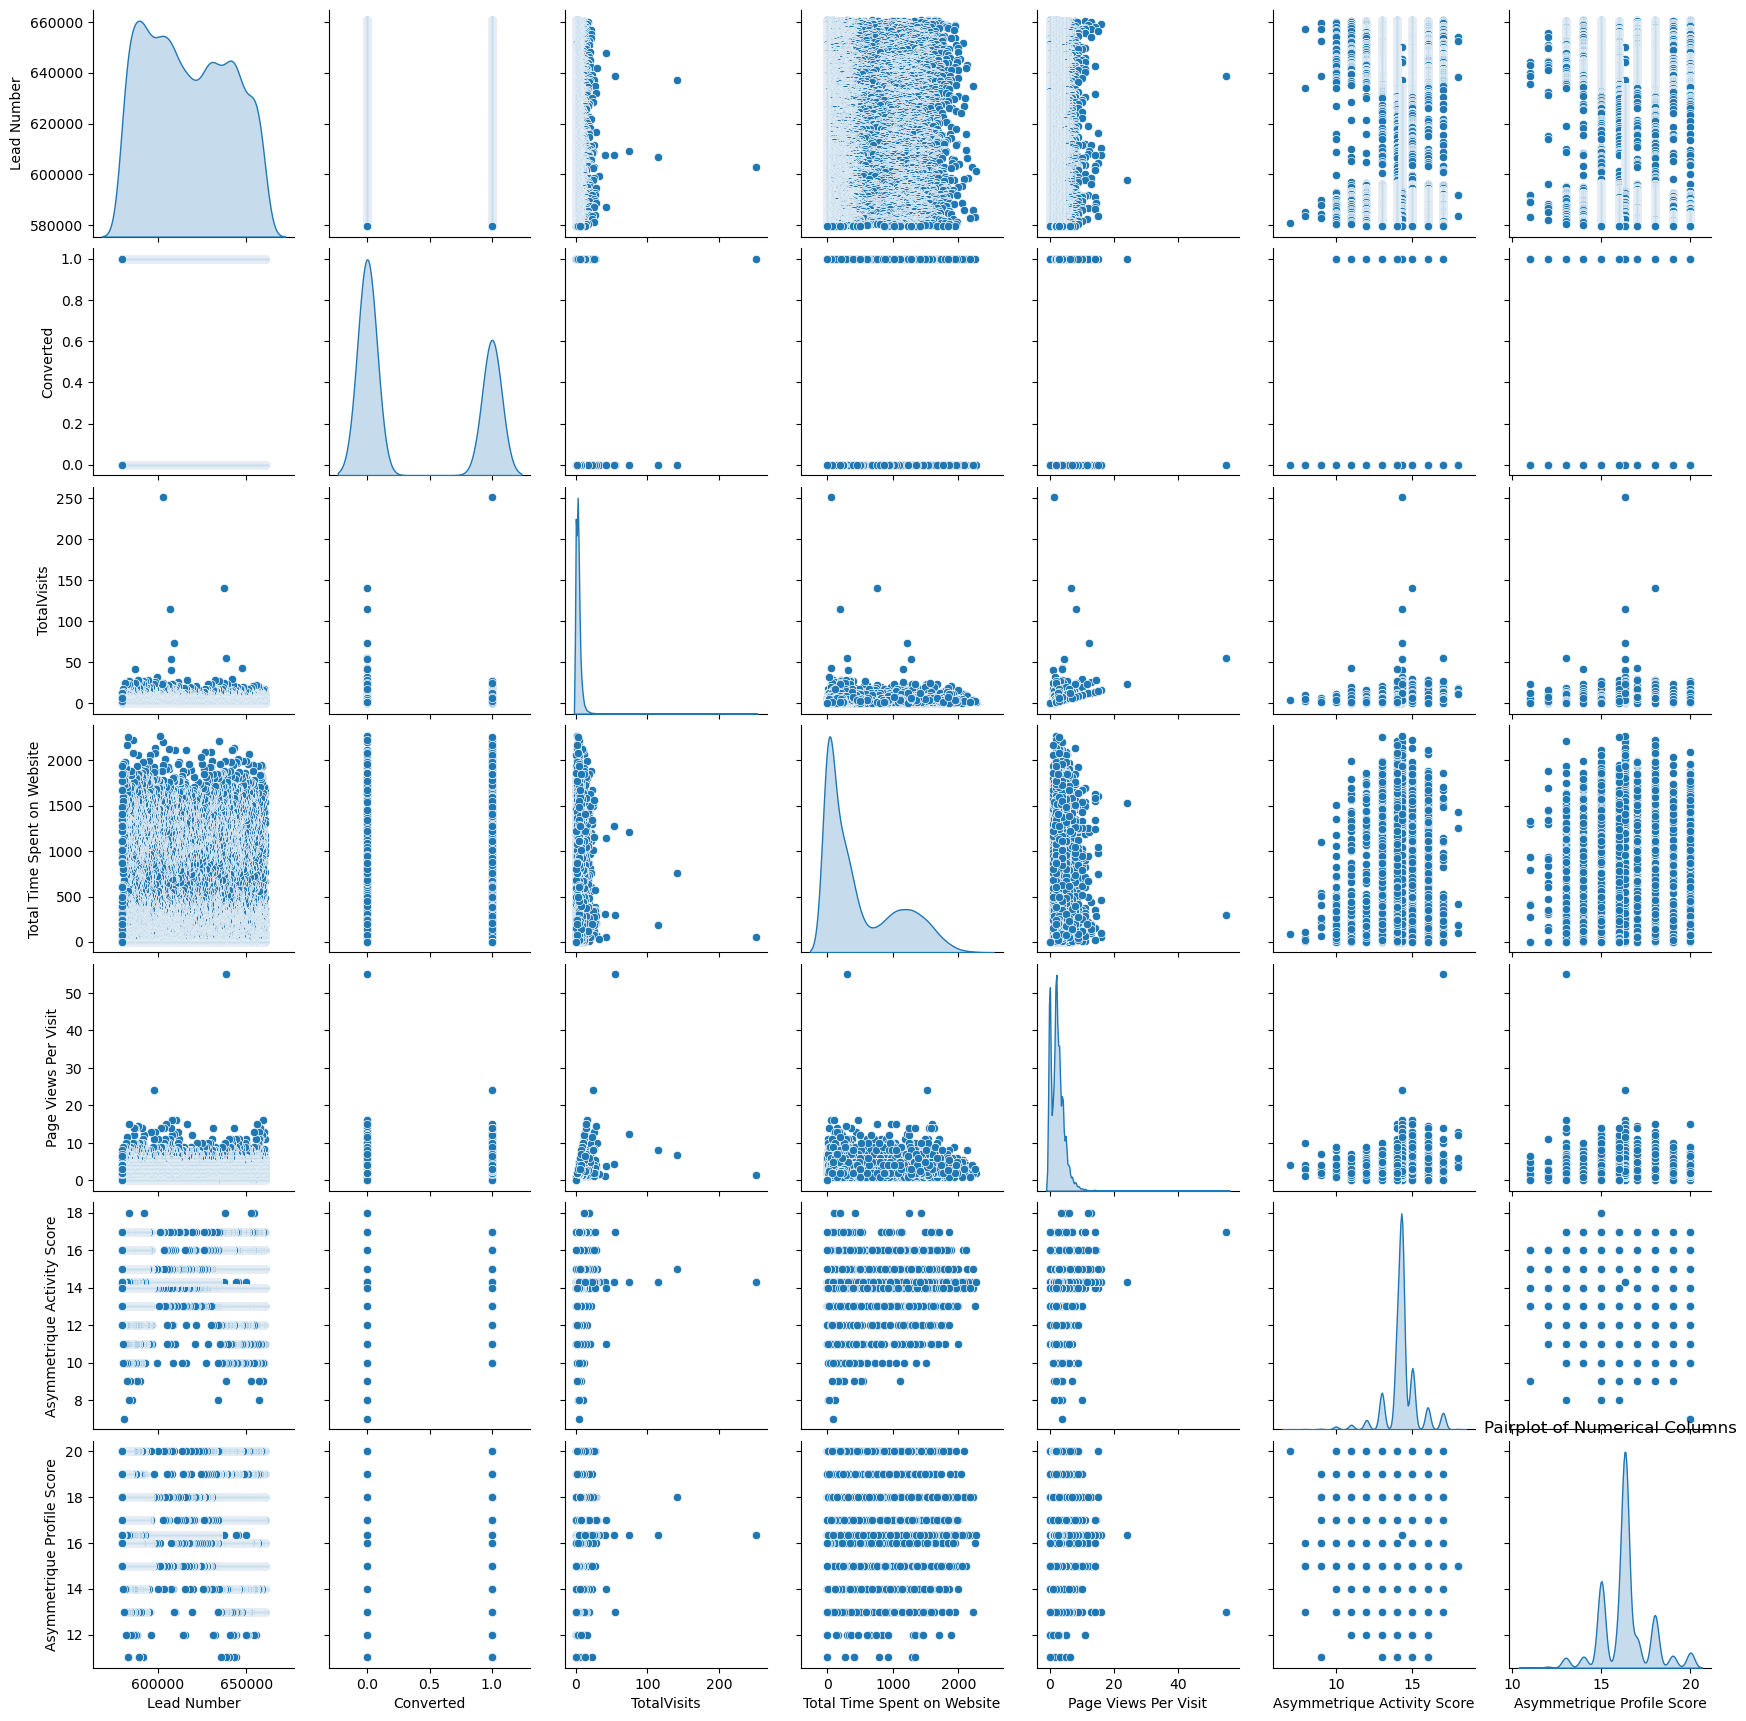

In [45]:
sns.pairplot(df[num_cols], diag_kind="kde", markers="o")
plt.title("Pairplot of Numerical Columns")
plt.show()

**Visualizing categorical columns using count plots**

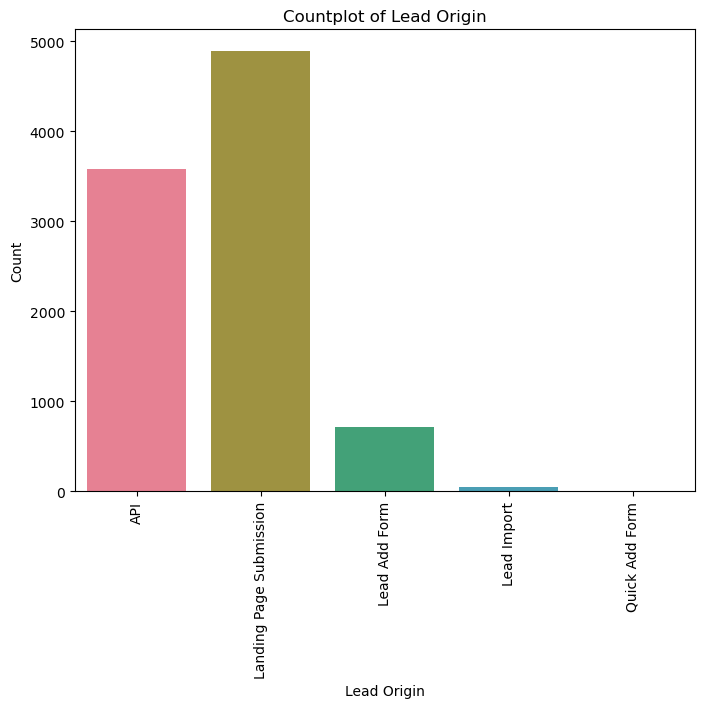

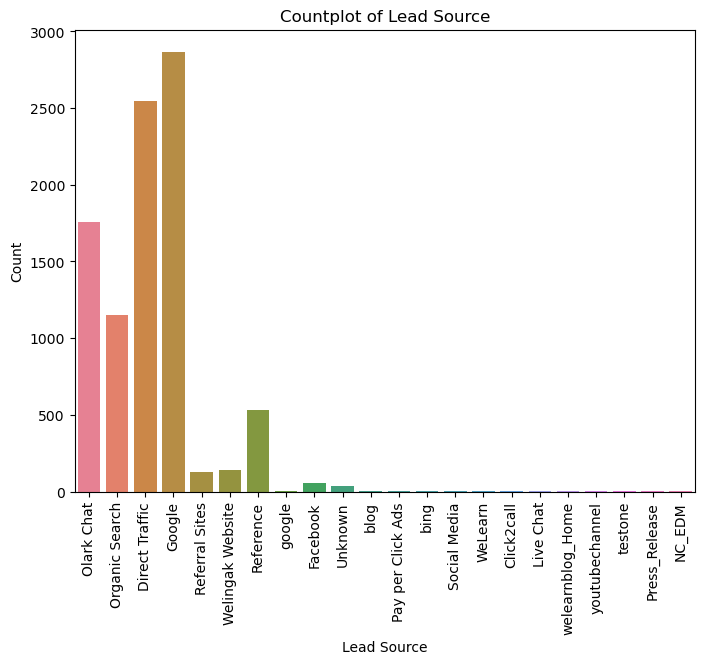

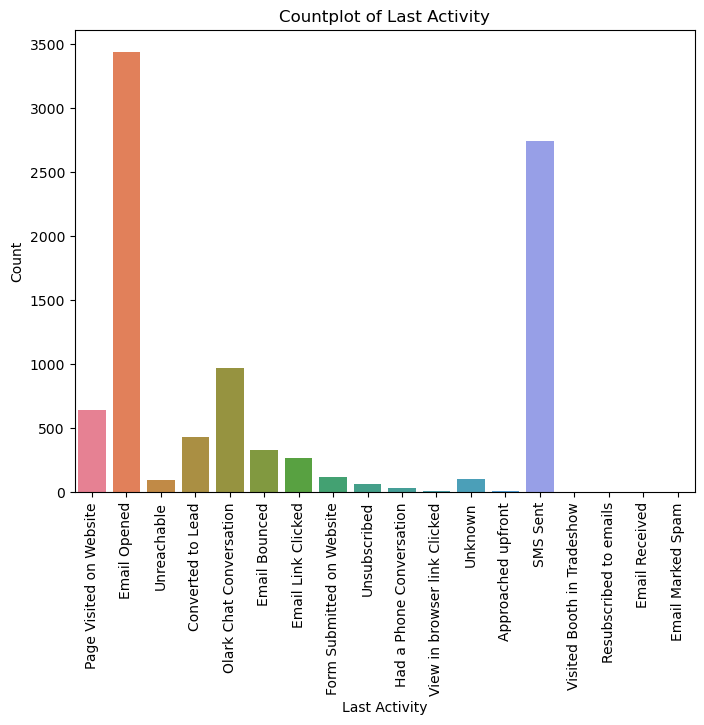

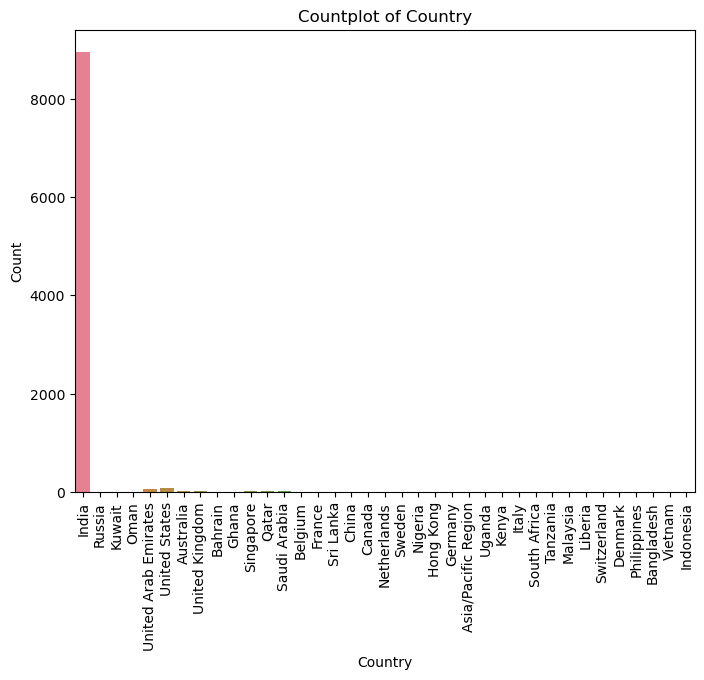

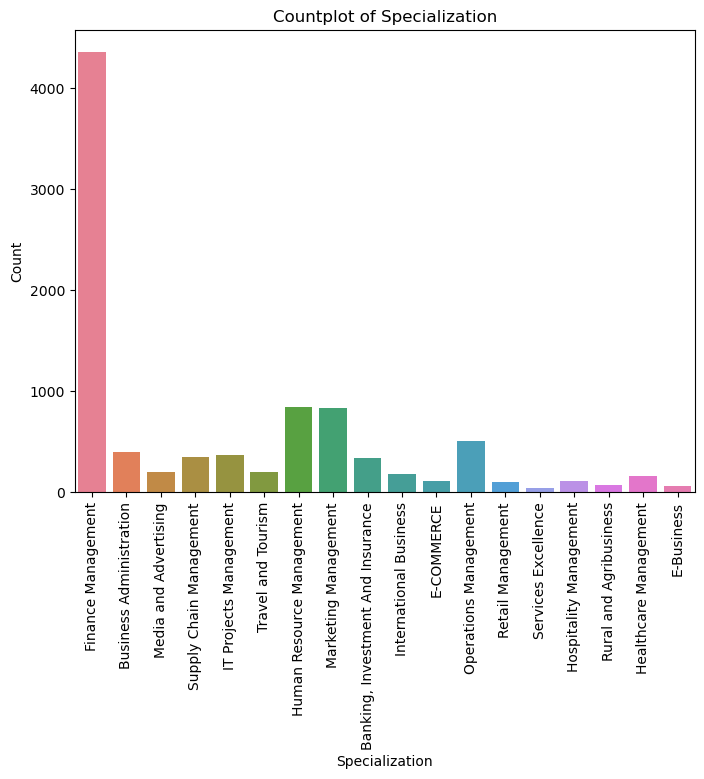

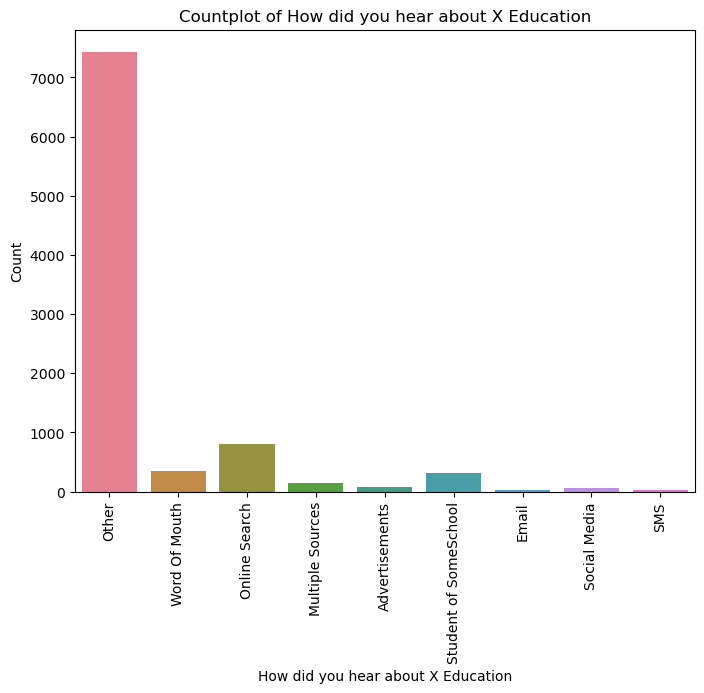

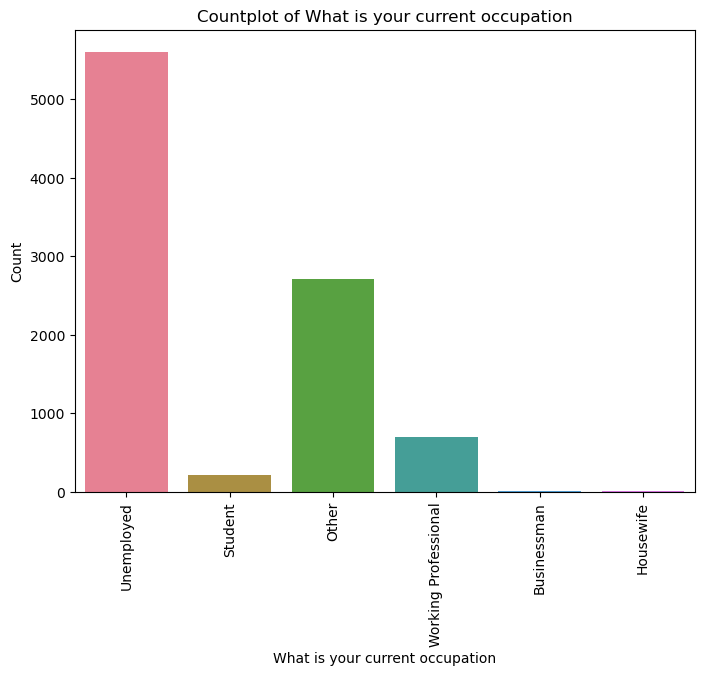

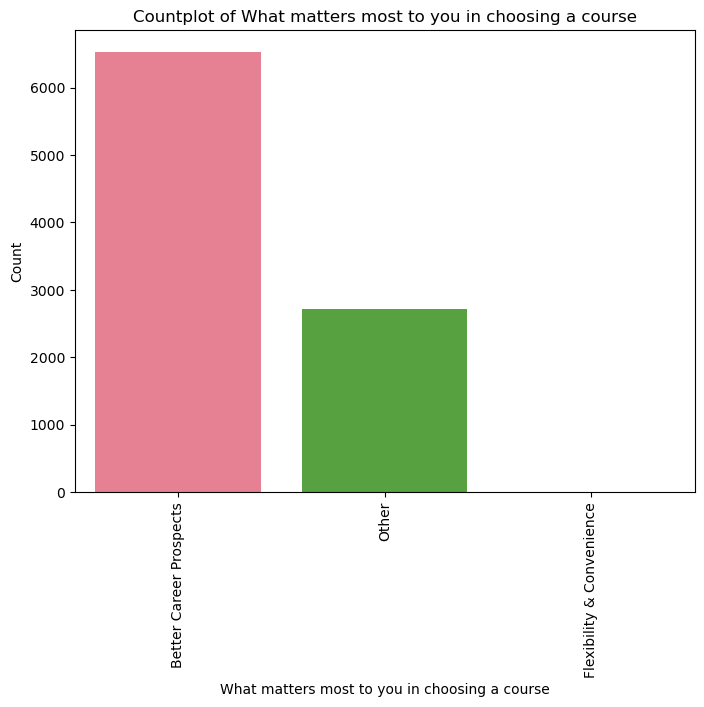

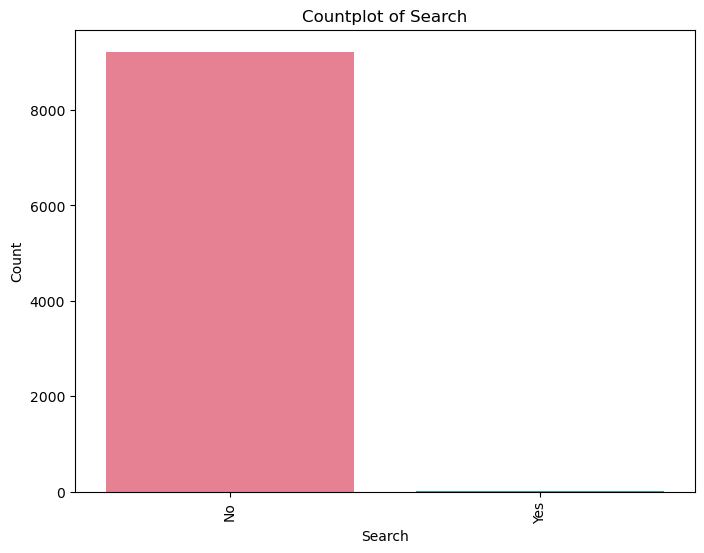

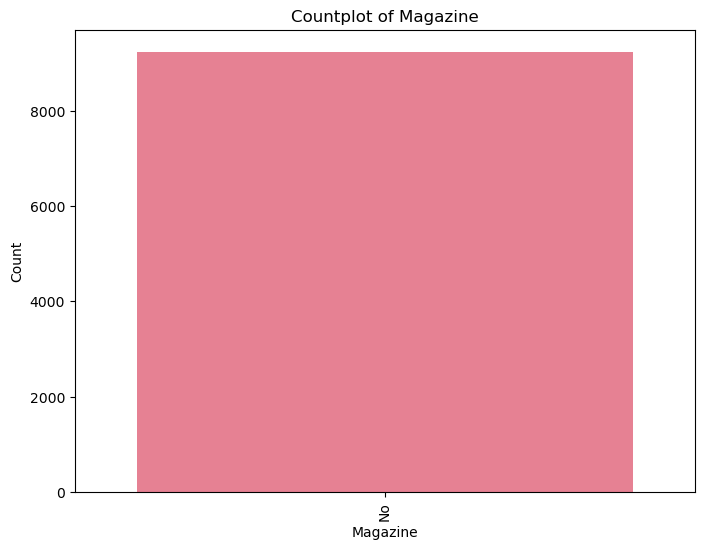

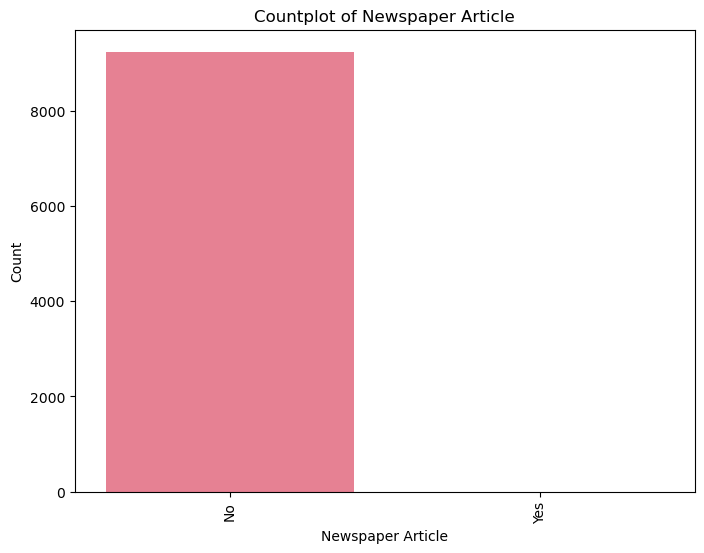

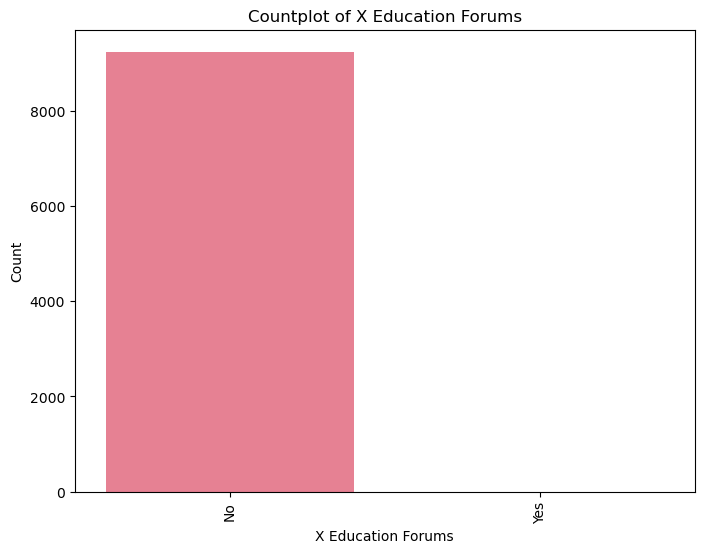

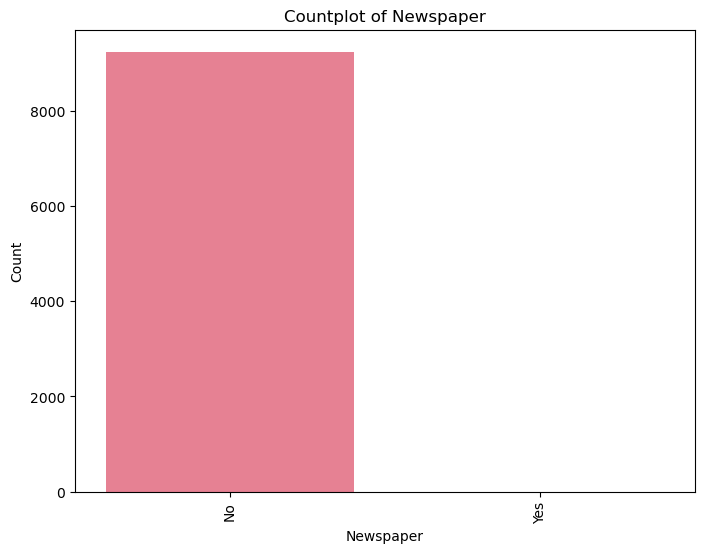

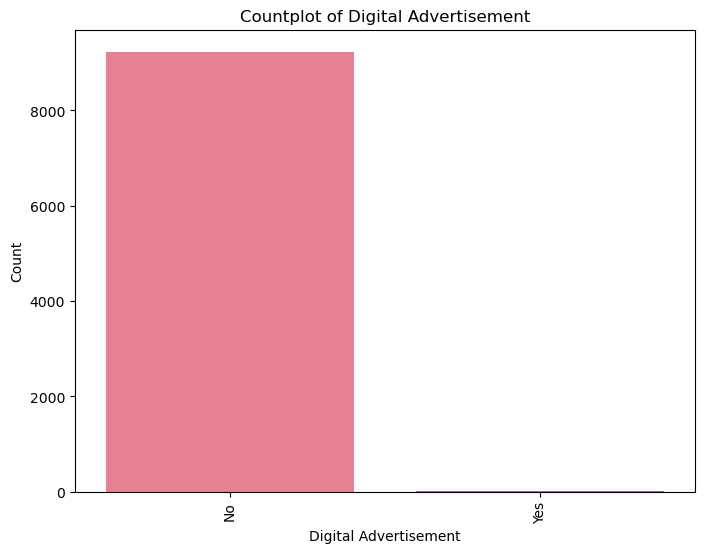

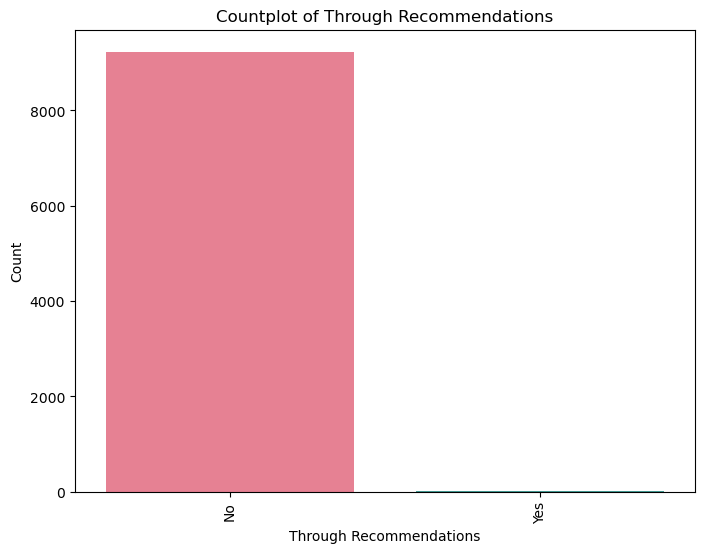

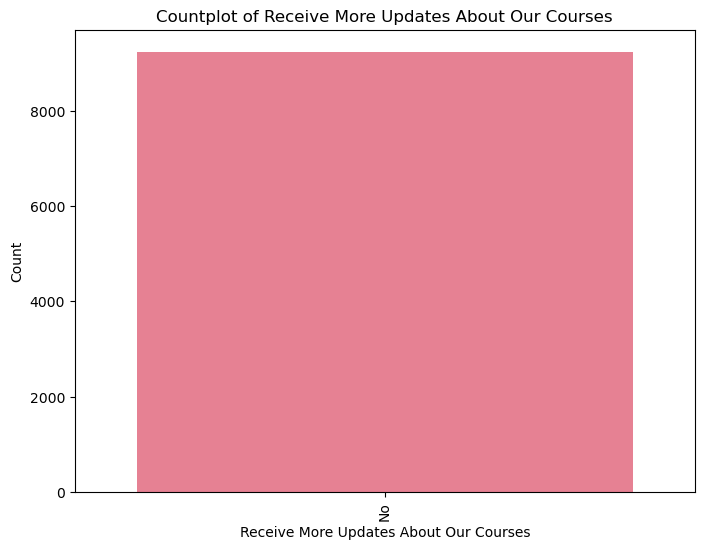

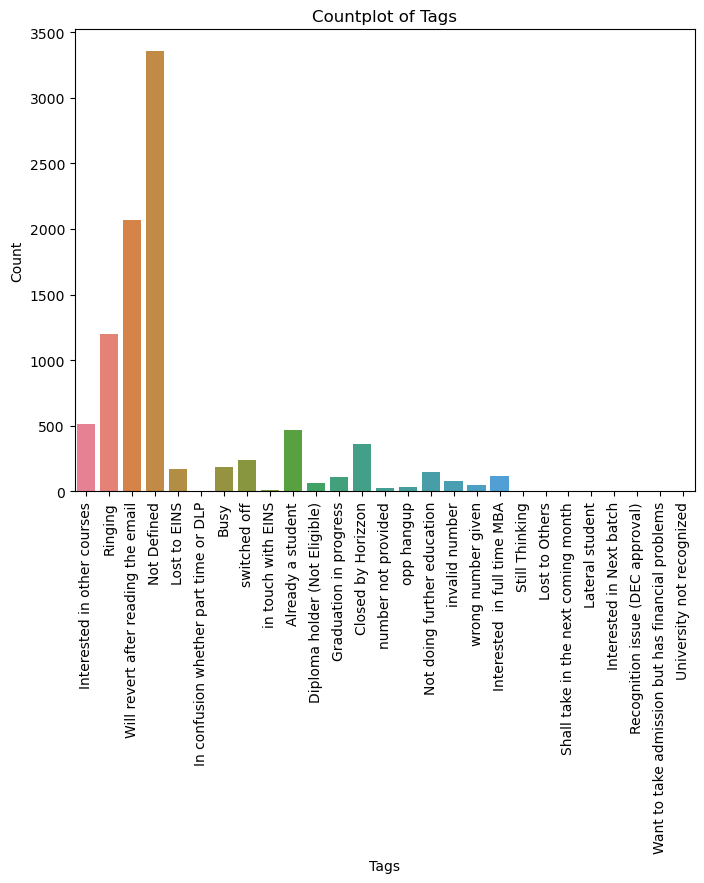

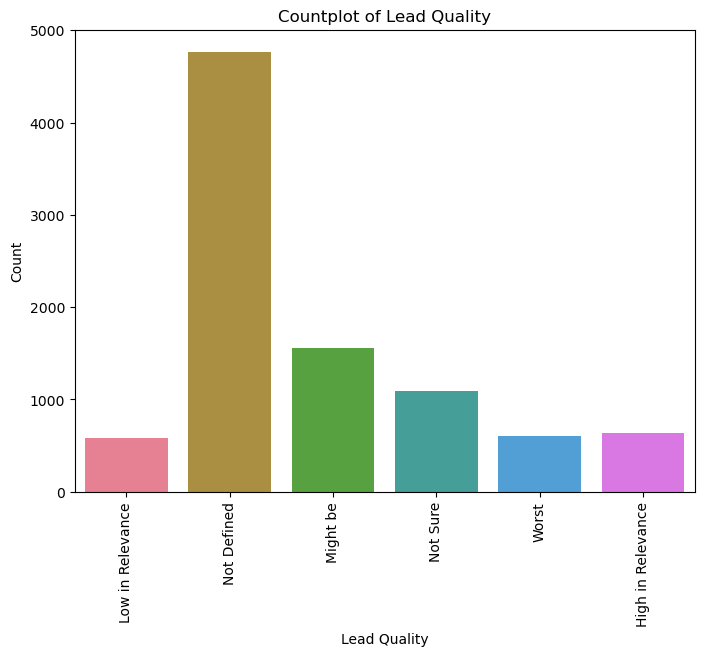

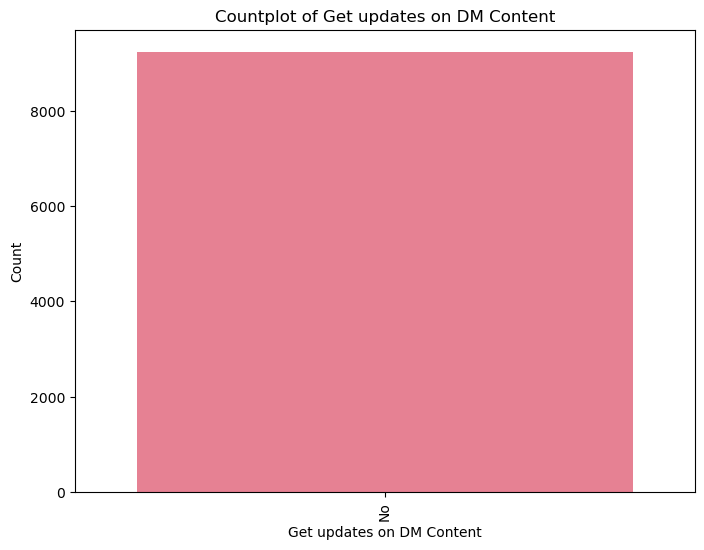

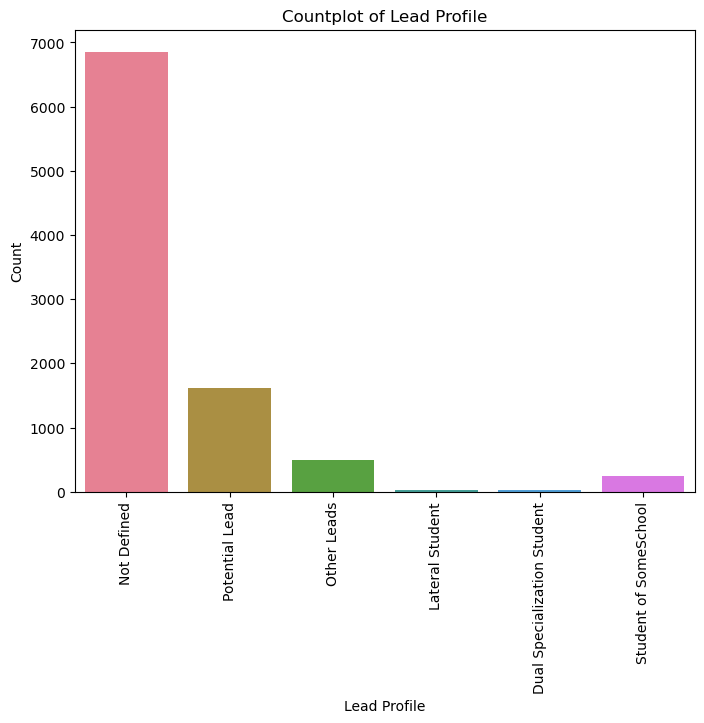

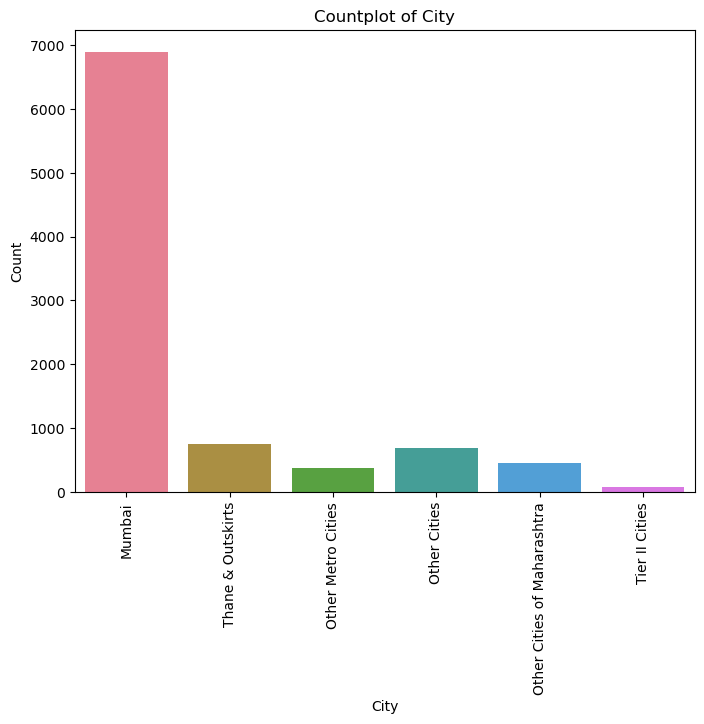

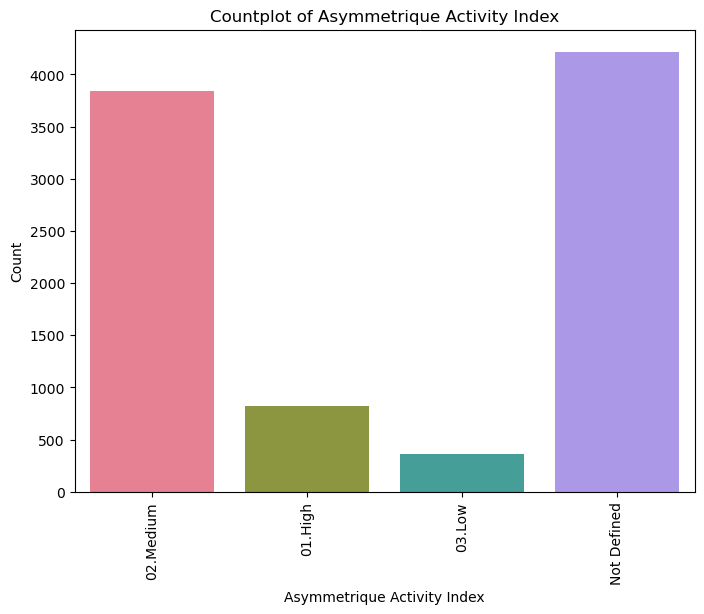

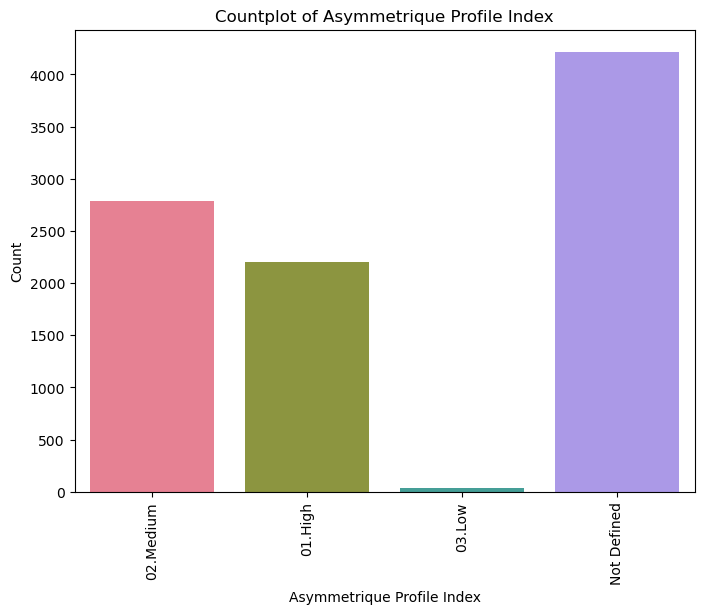

In [46]:
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, palette="husl")
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

**Dealing with outliers**

In [47]:
df[num_cols].describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9240.000000                  9240.000000   
mean   617188.435606     0.385390     3.445308                   487.698268   
std     23405.995698     0.486714     4.818723                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9240.000000                  9240.000000   
mean               2.362778                    14.307963   
std                2.145333                     1.022266   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.310000   
75%                3.000000                    14.310000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 9240.000000  
mean                    16.342654  
std                      1.335354  
min                     11.000000  
25%                     16.000000  
50%                     16.340000  
75%                     16.340000  
max                     20.000000

In [48]:
df[num_cols].median()

Lead Number                    615479.00
Converted                           0.00
TotalVisits                         3.00
Total Time Spent on Website       248.00
Page Views Per Visit                2.00
Asymmetrique Activity Score        14.31
Asymmetrique Profile Score         16.34
dtype: float64

In [49]:
df[num_cols].std()

Lead Number                    23405.995698
Converted                          0.486714
TotalVisits                        4.818723
Total Time Spent on Website      548.021466
Page Views Per Visit               2.145333
Asymmetrique Activity Score        1.022266
Asymmetrique Profile Score         1.335354
dtype: float64

In [50]:
def clip_outliers(x, threshold=3):
    median = np.median(x)
    std_dev = np.std(x)
    lower_bound = median - (threshold * std_dev)
    upper_bound = median + (threshold * std_dev)
    return np.clip(x, lower_bound, upper_bound)

In [51]:
# Apply clipping to the columns
df['TotalVisits'] = clip_outliers(df['TotalVisits'], threshold=3)
df['Total Time Spent on Website'] = clip_outliers(df['Total Time Spent on Website'], threshold=3)
df['Page Views Per Visit'] = clip_outliers(df['Page Views Per Visit'], threshold=3)

In [52]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9240.000000                  9240.000000   
mean   617188.435606     0.385390     3.338577                   486.915541   
std     23405.995698     0.486714     3.245803                   545.867978   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000    17.455388                  1891.975432   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9240.000000                  9240.000000   
mean               2.327051                    14.307963   
std                1.947016                     1.022266   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.310000   
75%                3.000000                    14.310000   
max                8.435650                    18.000000   

       Asymmetrique Profile Score  
count                 9240.000000  
mean                    16.342654  
std                      1.335354  
min                     11.000000  
25%                     16.000000  
50%                     16.340000  
75%                     16.340000  
max                     20.000000

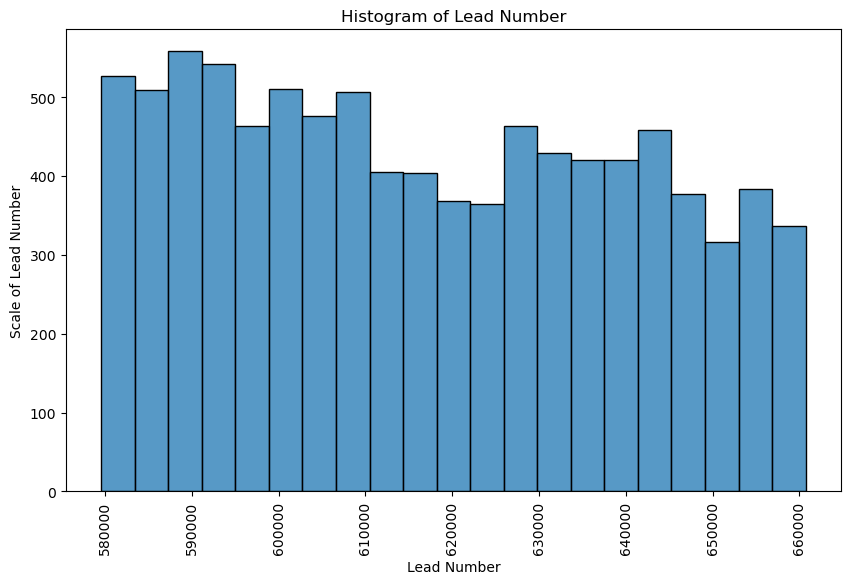

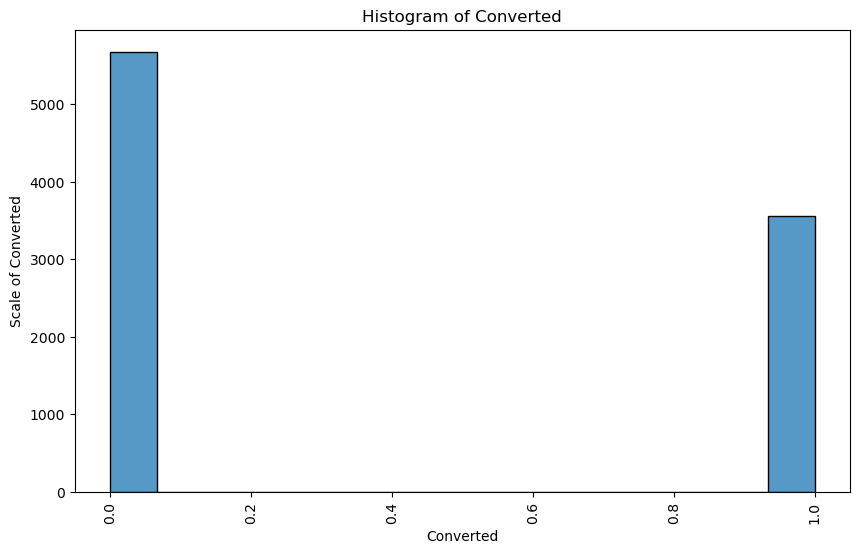

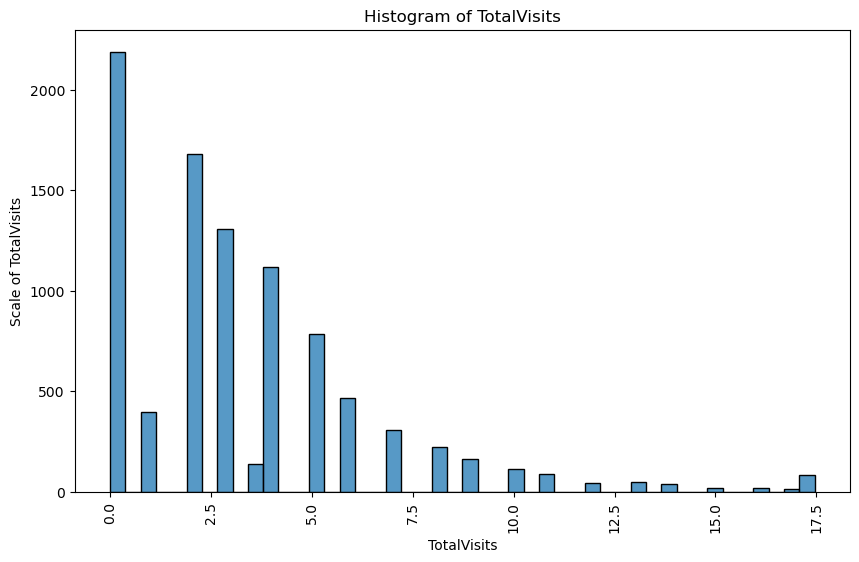

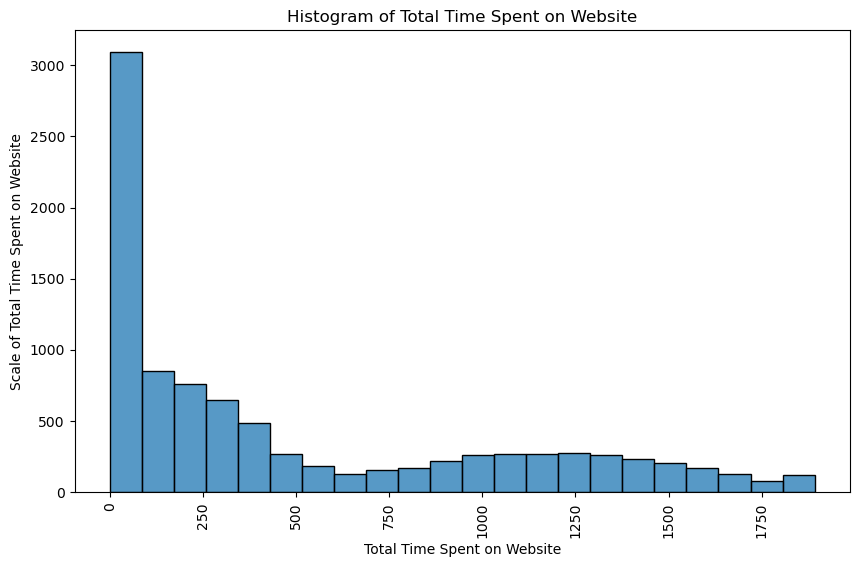

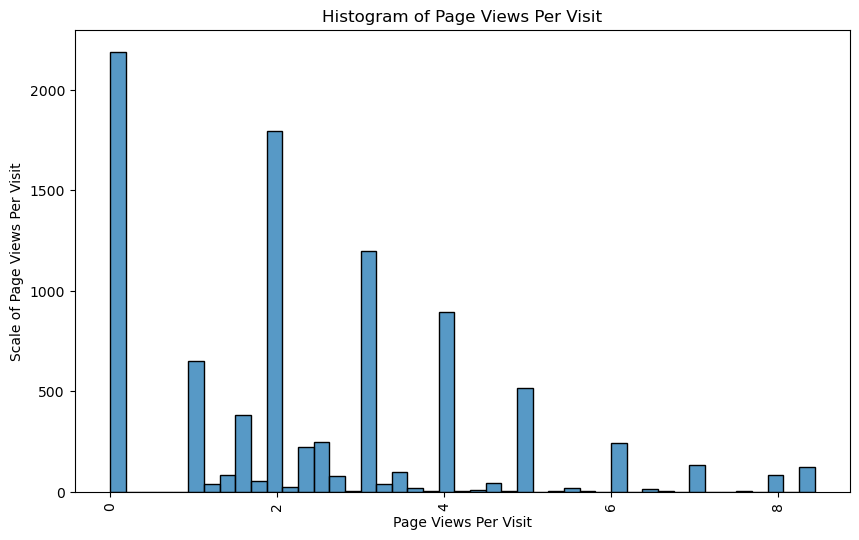

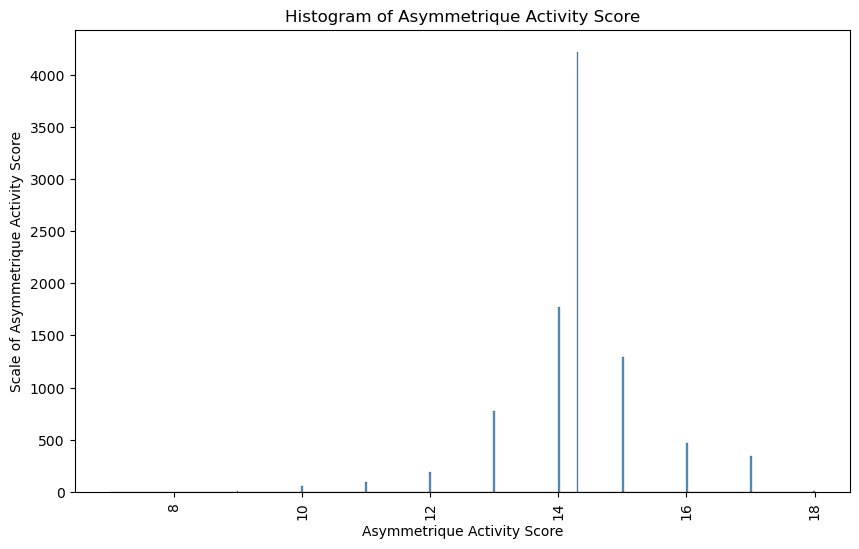

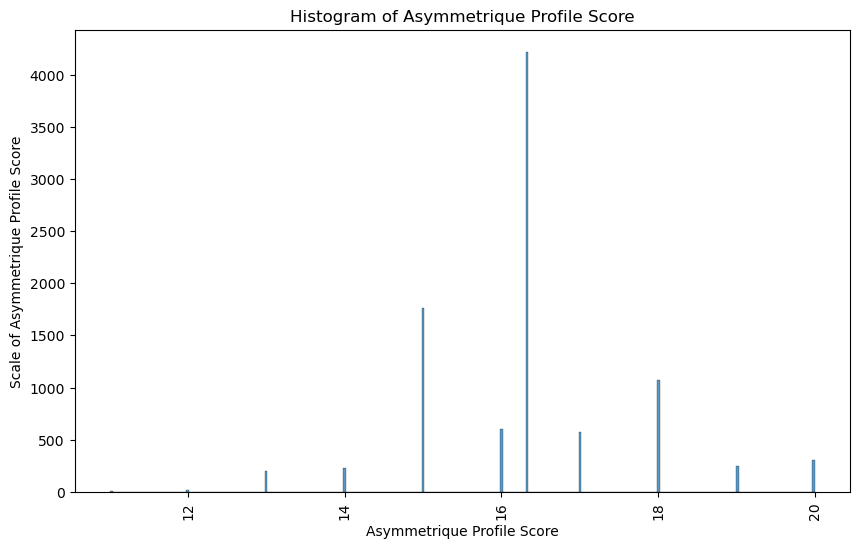

In [53]:
for col in num_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Scale of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [54]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Get updates on DM Content', 'Lead Profile', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

**Univariate Analysis - categorical unordered data**

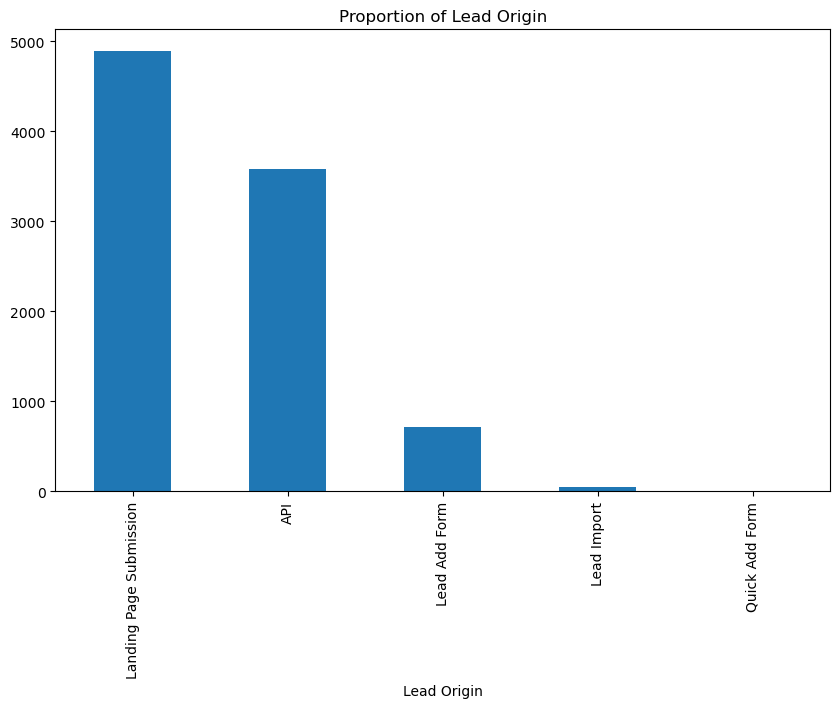

In [55]:
plt.figure(figsize=(10, 6))
df['Lead Origin'].value_counts().plot.bar()
plt.title('Proportion of Lead Origin')
plt.show()

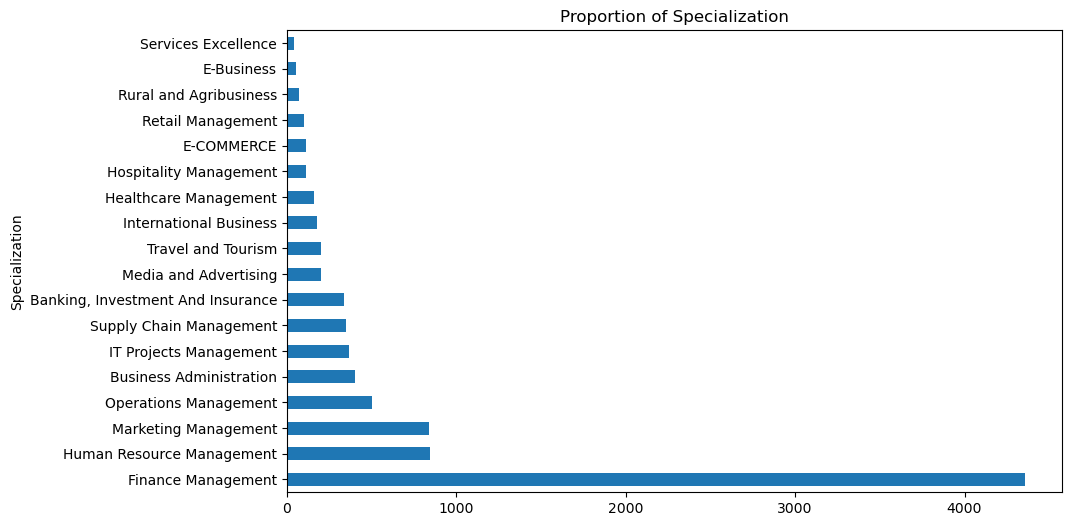

In [56]:
plt.figure(figsize=(10, 6))
df['Specialization'].value_counts().plot.barh()
plt.title('Proportion of Specialization')
plt.show()

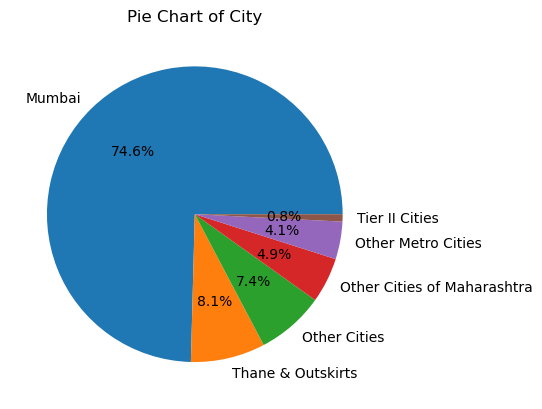

In [57]:
frequency_distribution = df['City'].value_counts()
plt.pie(frequency_distribution.values, labels=frequency_distribution.index, autopct='%1.1f%%')
plt.title('Pie Chart of City')
plt.show()

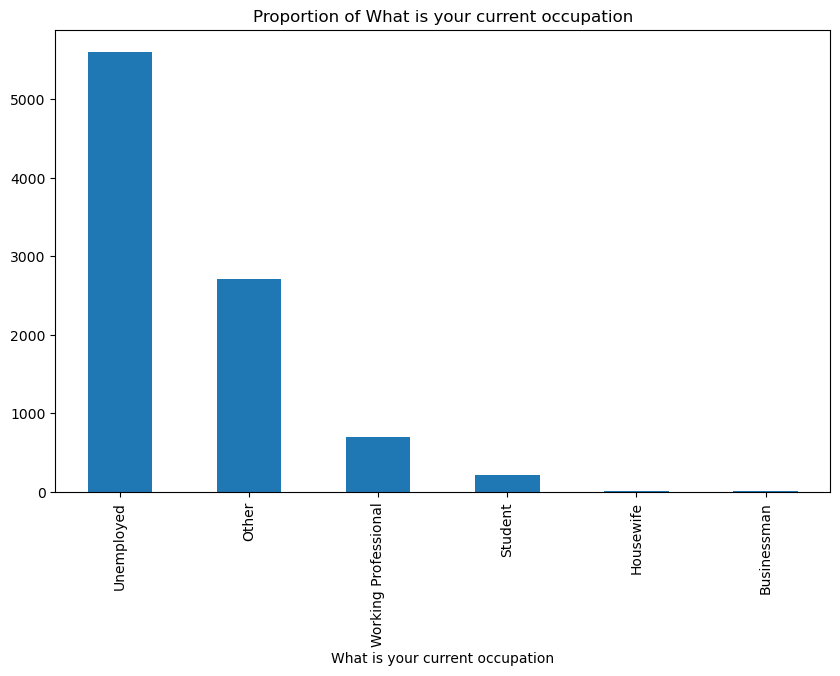

In [58]:
plt.figure(figsize=(10, 6))
df['What is your current occupation'].value_counts().plot.bar()
plt.title('Proportion of What is your current occupation')
plt.show()

**Univariate Analysis - categorial ordered data**

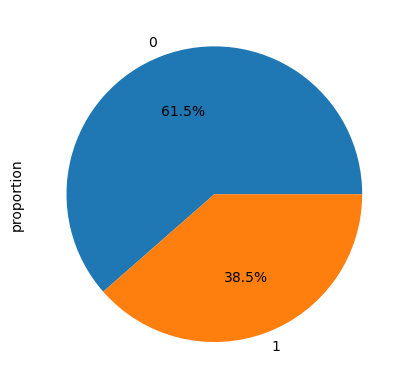

In [59]:
df.Converted.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

Lead Quality
Not Defined          4767
Might be             6327
Not Sure             7419
High in Relevance    8056
Worst                8657
Low in Relevance     9240
Name: count, dtype: int64


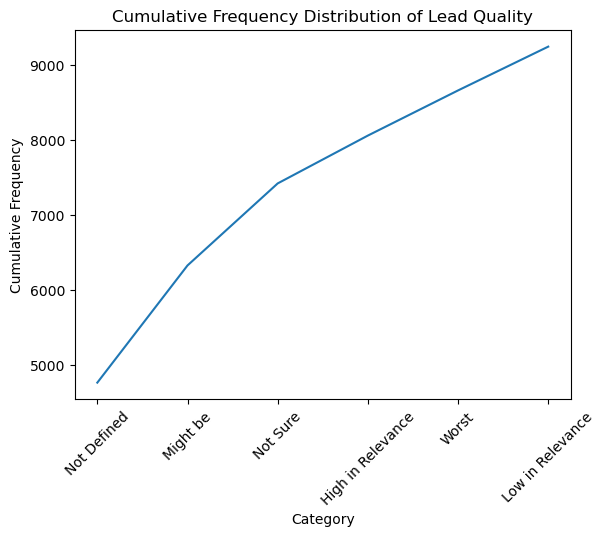

In [60]:
# Calculating the frequency distribution
frequency_distribution = df['Lead Quality'].value_counts()

# Calculating the cumulative frequency distribution
cumulative_frequency_distribution = frequency_distribution.cumsum()
print(cumulative_frequency_distribution)

# Visualizing the cumulative frequency distribution
plt.plot(cumulative_frequency_distribution.index, cumulative_frequency_distribution.values)
plt.xlabel('Category')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency Distribution of Lead Quality')
plt.xticks(rotation=45)
plt.show()

**Bivariate Analysis**

*1. Lead Source Analysis*

In [61]:
###75th percentile

def p75(x):
  return np.quantile(x,0.75)

In [62]:
df.groupby("Lead Source")["Converted"].aggregate(["mean", "median", p75])

mean  median   p75
Lead Source                              
Click2call         0.750000     1.0  1.00
Direct Traffic     0.321667     0.0  1.00
Facebook           0.236364     0.0  0.00
Google             0.399930     0.0  1.00
Live Chat          1.000000     1.0  1.00
NC_EDM             1.000000     1.0  1.00
Olark Chat         0.255271     0.0  1.00
Organic Search     0.377816     0.0  1.00
Pay per Click Ads  0.000000     0.0  0.00
Press_Release      0.000000     0.0  0.00
Reference          0.917603     1.0  1.00
Referral Sites     0.248000     0.0  0.00
Social Media       0.500000     0.5  0.75
Unknown            0.805556     1.0  1.00
WeLearn            1.000000     1.0  1.00
Welingak Website   0.985915     1.0  1.00
bing               0.166667     0.0  0.00
blog               0.000000     0.0  0.00
google             0.000000     0.0  0.00
testone            0.000000     0.0  0.00
welearnblog_Home   0.000000     0.0  0.00
youtubechannel     0.000000     0.0  0.00

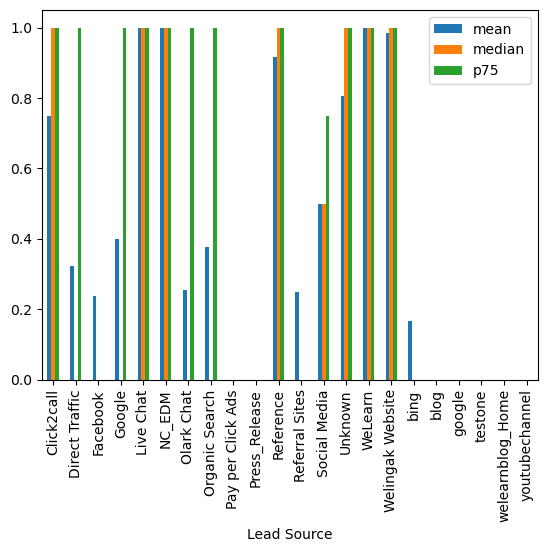

In [63]:
df.groupby("Lead Source")["Converted"].aggregate(["mean", "median", p75]).plot.bar()
plt.show()

*2. Website Engagement Analysis*

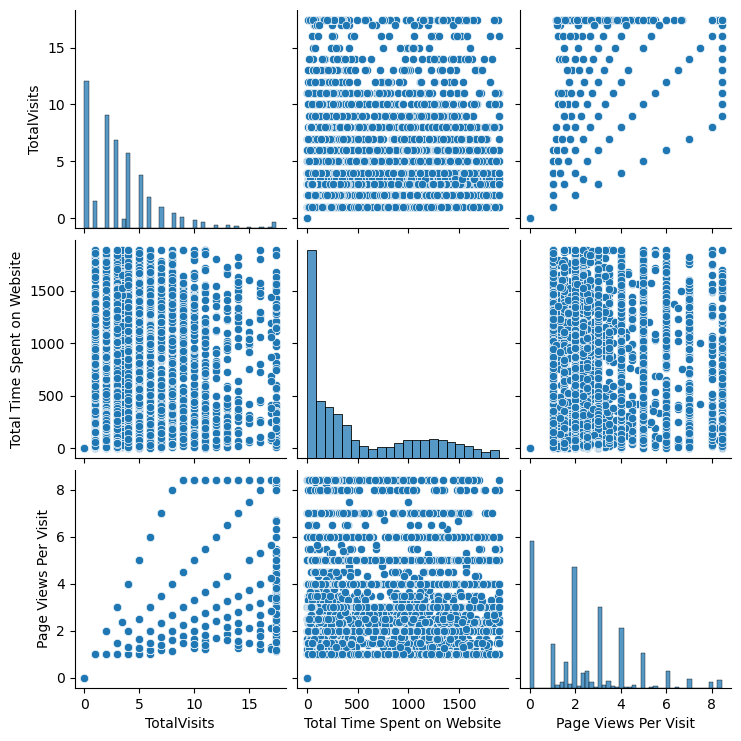

In [64]:
# pair plot
sns.pairplot(data=df, vars=["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"])
plt.show()

*3. Lead Quality Analysis*

In [65]:
df.groupby("Lead Quality")["Converted"].aggregate(["mean", "median", p75])

mean  median  p75
Lead Quality                            
High in Relevance  0.946625     1.0  1.0
Low in Relevance   0.818182     1.0  1.0
Might be           0.755769     1.0  1.0
Not Defined        0.214810     0.0  0.0
Not Sure           0.243590     0.0  0.0
Worst              0.019967     0.0  0.0

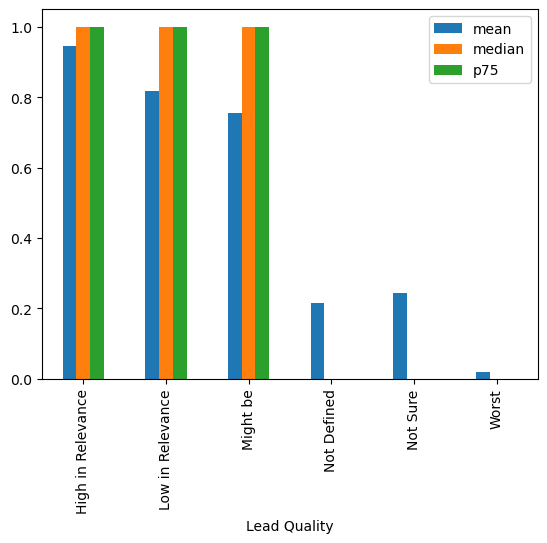

In [66]:
df.groupby("Lead Quality")["Converted"].aggregate(["mean", "median", p75]).plot.bar()
plt.show()

*4. Demographic Analysis*

In [67]:
df.groupby("What is your current occupation")["Converted"].mean()

What is your current occupation
Businessman             0.625000
Housewife               1.000000
Other                   0.140429
Student                 0.371429
Unemployed              0.435893
Working Professional    0.916431
Name: Converted, dtype: float64

In [68]:
df.groupby("Specialization")["Converted"].mean()

Specialization
Banking, Investment And Insurance    0.494083
Business Administration              0.444169
E-Business                           0.368421
E-COMMERCE                           0.357143
Finance Management                   0.322544
Healthcare Management                0.496855
Hospitality Management               0.421053
Human Resource Management            0.457547
IT Projects Management               0.382514
International Business               0.359551
Marketing Management                 0.486874
Media and Advertising                0.418719
Operations Management                0.473161
Retail Management                    0.340000
Rural and Agribusiness               0.424658
Services Excellence                  0.275000
Supply Chain Management              0.432665
Travel and Tourism                   0.354680
Name: Converted, dtype: float64

In [69]:
df.groupby("Country")["Converted"].mean()

Country
Asia/Pacific Region     0.500000
Australia               0.230769
Bahrain                 0.571429
Bangladesh              0.500000
Belgium                 0.000000
Canada                  0.000000
China                   0.000000
Denmark                 1.000000
France                  0.500000
Germany                 0.250000
Ghana                   0.000000
Hong Kong               0.571429
India                   0.388256
Indonesia               0.000000
Italy                   0.000000
Kenya                   0.000000
Kuwait                  0.000000
Liberia                 0.000000
Malaysia                0.000000
Netherlands             0.500000
Nigeria                 0.000000
Oman                    0.500000
Philippines             0.000000
Qatar                   0.100000
Russia                  0.000000
Saudi Arabia            0.190476
Singapore               0.458333
South Africa            0.250000
Sri Lanka               0.000000
Sweden                  0.333333
Sw

In [70]:
df.groupby("City")["Converted"].mean()

City
Mumbai                         0.372370
Other Cities                   0.402332
Other Cities of Maharashtra    0.439825
Other Metro Cities             0.407895
Thane & Outskirts              0.449468
Tier II Cities                 0.337838
Name: Converted, dtype: float64

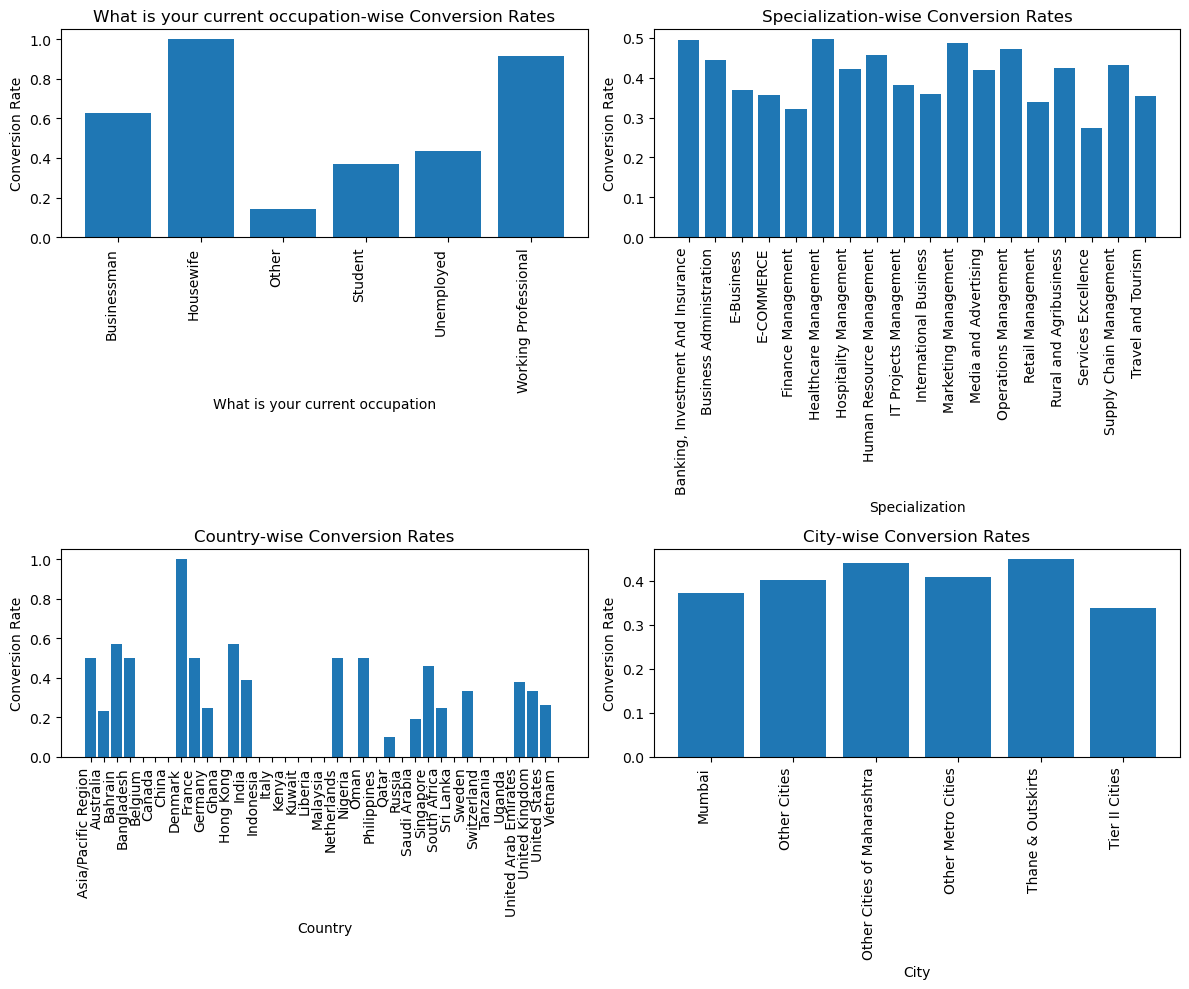

In [71]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for ax, col in zip(axs.flatten(), ['What is your current occupation', 'Specialization', 'Country', 'City']):
    conversion_rates = df.groupby(col)["Converted"].mean()
    ax.bar(conversion_rates.index, conversion_rates.values)
    ax.set_title(f'{col}-wise Conversion Rates')
    ax.set_xlabel(col)
    ax.set_ylabel('Conversion Rate')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # rotate x-axis tick labels by 90 degrees

plt.tight_layout()
plt.show()

*5. Asymmetrique Index Analysis*

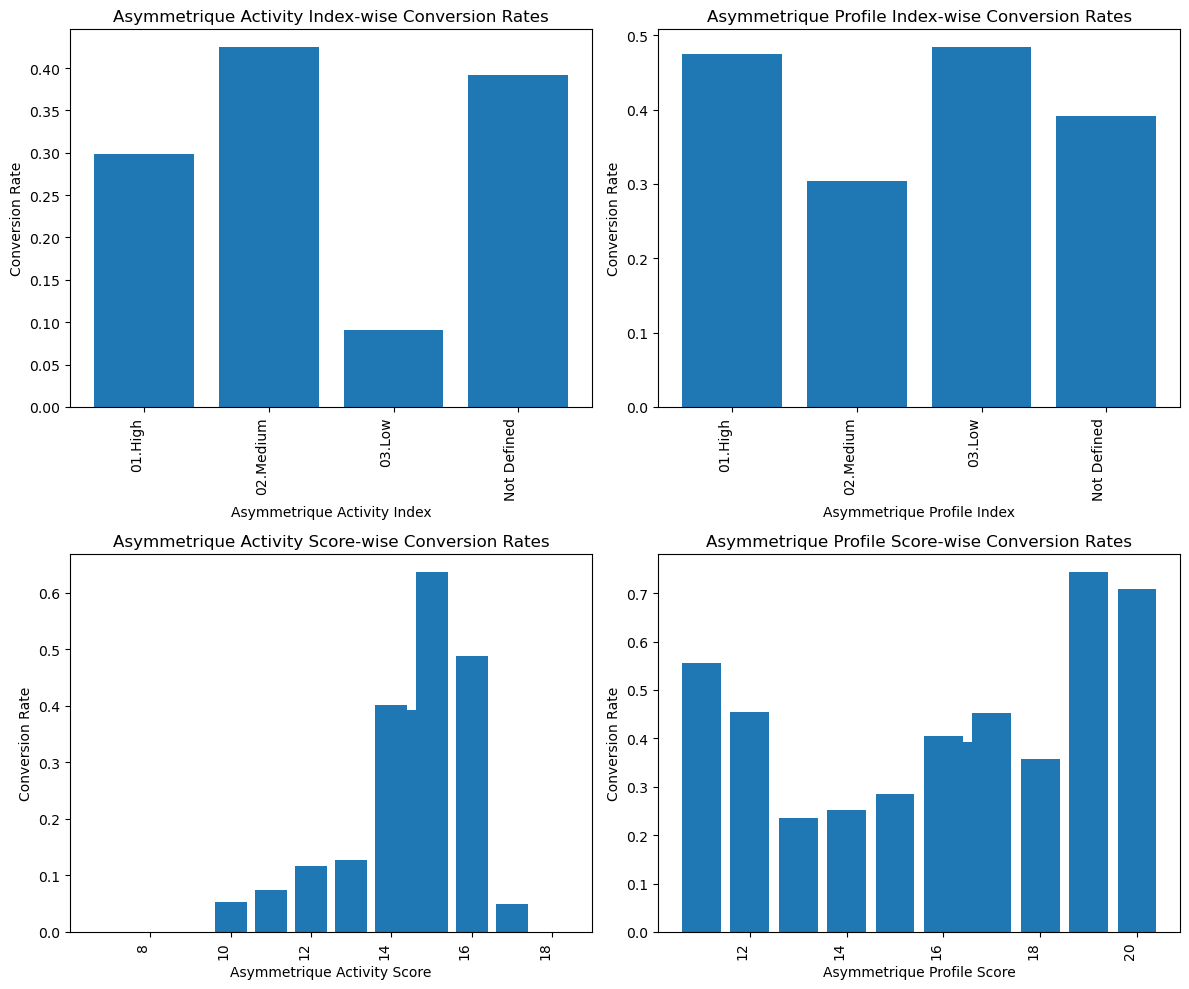

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for ax, col in zip(axs.flatten(), ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']):
    conversion_rates = df.groupby(col)["Converted"].mean()
    ax.bar(conversion_rates.index, conversion_rates.values)
    ax.set_title(f'{col}-wise Conversion Rates')
    ax.set_xlabel(col)
    ax.set_ylabel('Conversion Rate')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # rotate x-axis tick labels by 90 degrees

plt.tight_layout()
plt.show()

In [73]:
## Checking for correlation between numerical columns and the Converted variable
corr_matrix = df[num_cols + ['Converted']].corr()

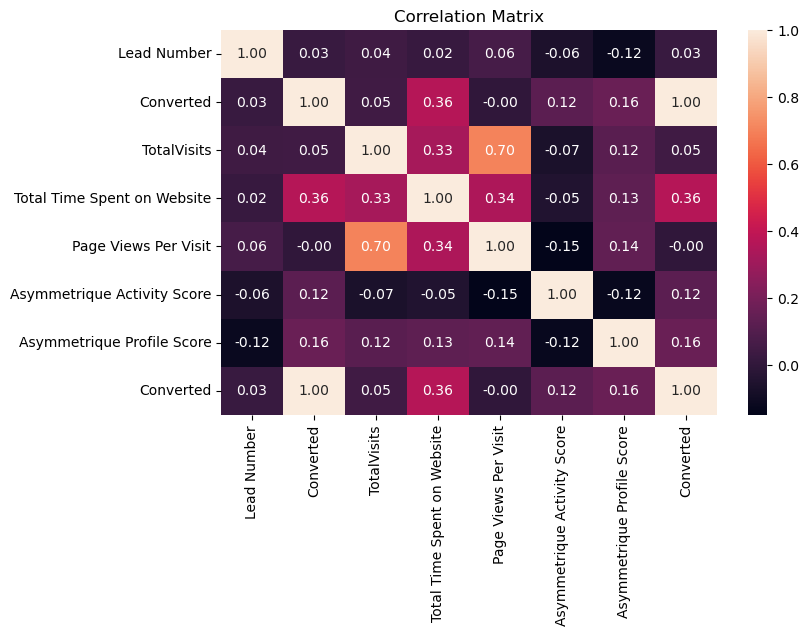

In [74]:
## Visualizing correlation matrix using heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Dropping columns that are highly and weakly correlation to avoid multicollinearity issues**

**Highly Correlated Columns:**

TotalVisits and PageViewsPerVisit*: These two columns are highly correlated (0.93). Dropping PageViewsPerVisit as it's likely redundant.

*AsymmetriqueActivityIndex and AsymmetriqueActivityScore*: These two columns are highly correlated (0.99). Dropping AsymmetriqueActivityIndex as it's likely redundant.

*AsymmetriqueProfileIndex and AsymmetriqueProfileScore*: These two columns are highly correlated (0.99). Dropping AsymmetriqueProfileIndex as it's likely redundant.

**Weakly Correlated Columns:**

*Country*: This column is weakly correlated with all other columns. You can consider dropping it if it's not relevant to the lead scoring model.

In [75]:
col_to_drop = ['Page Views Per Visit', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Country']

In [76]:
df = df.drop(columns=col_to_drop)

In [77]:
# Consolidating the ad columns
ad_columns = [
    'Search',
    'Magazine',
    'Newspaper Article',
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Through Recommendations'
]

# create a new column indicating whether the customer saw any ad
df['Saw_Ad'] = df[ad_columns].eq('Yes').any(axis=1).astype(int)

In [78]:
df['Saw_Ad'].value_counts()

Saw_Ad
0    9217
1      23
Name: count, dtype: int64

In [79]:
df = df.drop(columns=ad_columns)

In [80]:
df.shape

(9240, 20)

In [81]:
df.dtypes

Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                      float64
Last Activity                                     object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Receive More Updates About Our Courses            object
Tags                                              object
Lead Quality                                      object
Get updates on DM Content                         object
Lead Profile                                      object
City                                              object
Asymmetrique Activity Score    

In [82]:
# Re-create the lists of categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [83]:
print(cat_cols)
print(len(cat_cols))

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Get updates on DM Content', 'Lead Profile', 'City']
13


In [84]:
print(num_cols)
print(len(num_cols))

['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Saw_Ad']
7


**Checking the distribution of each numerical variable by target variable**

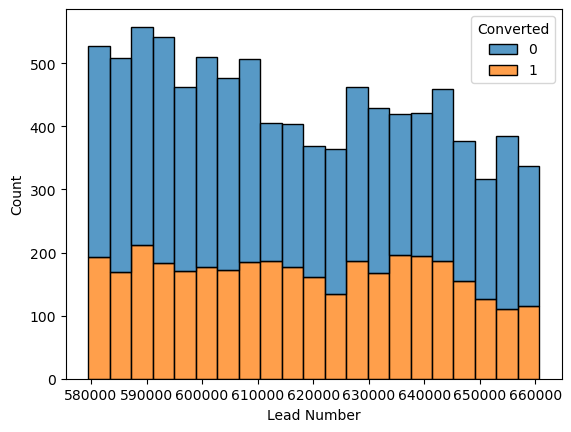

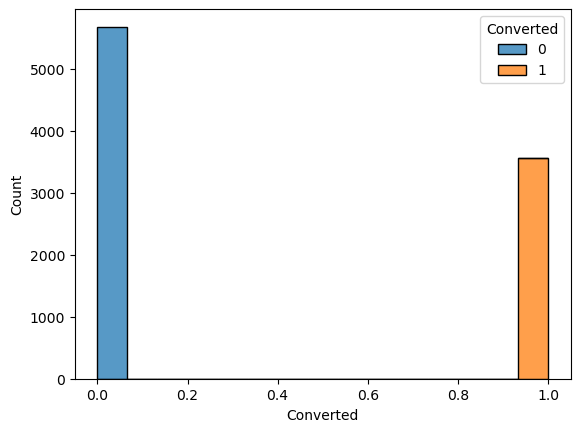

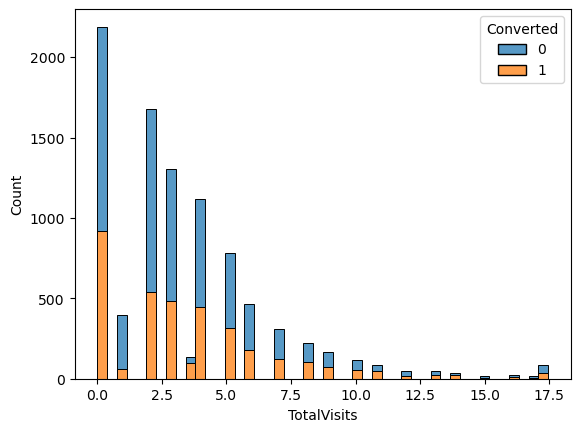

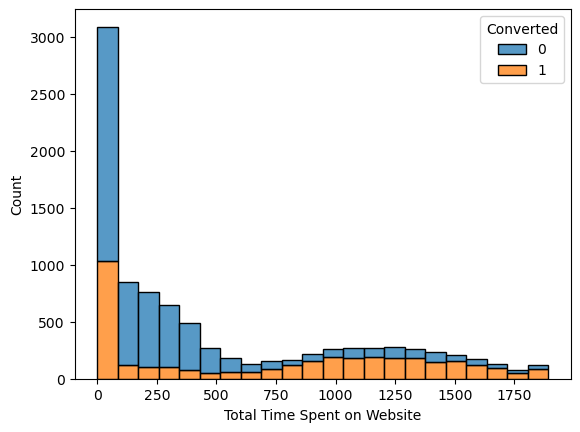

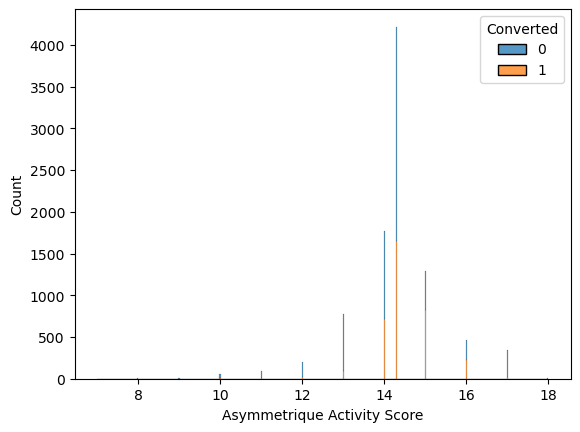

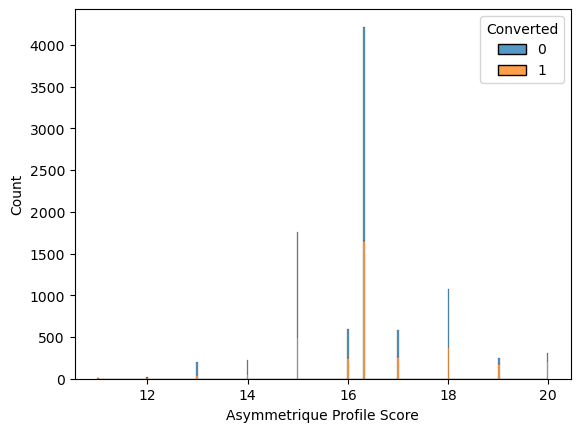

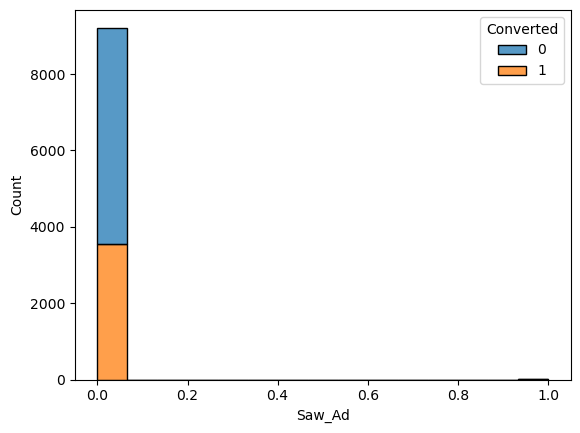

In [85]:
for col in num_cols:
    sns.histplot(x=col, hue='Converted', data=df, multiple='stack')
    plt.show()

**Checking the distribution of each categorical variable by target variable**

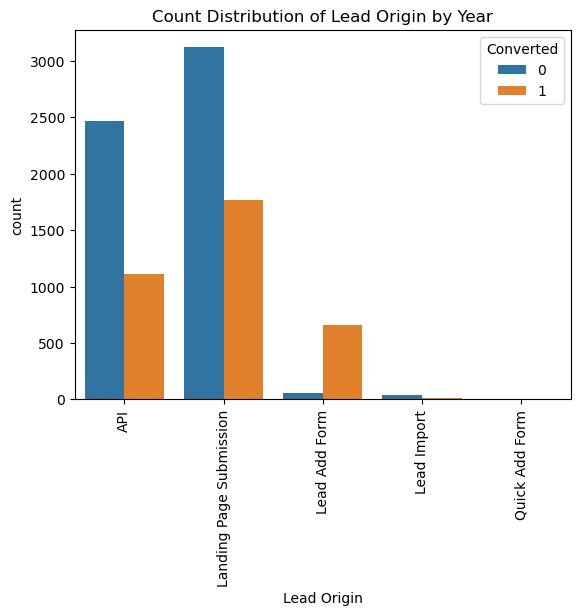

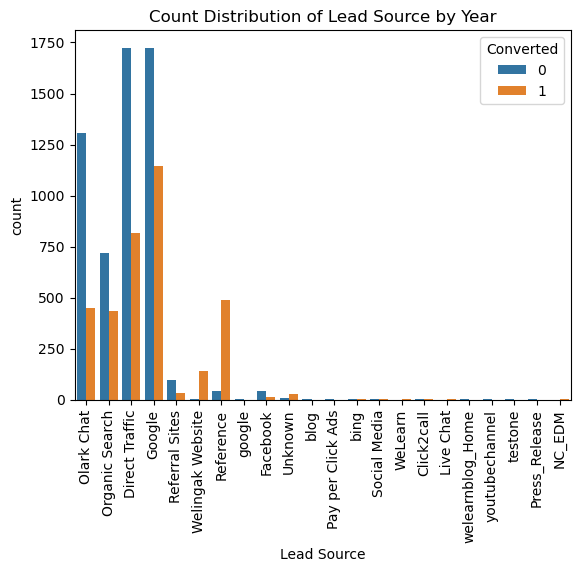

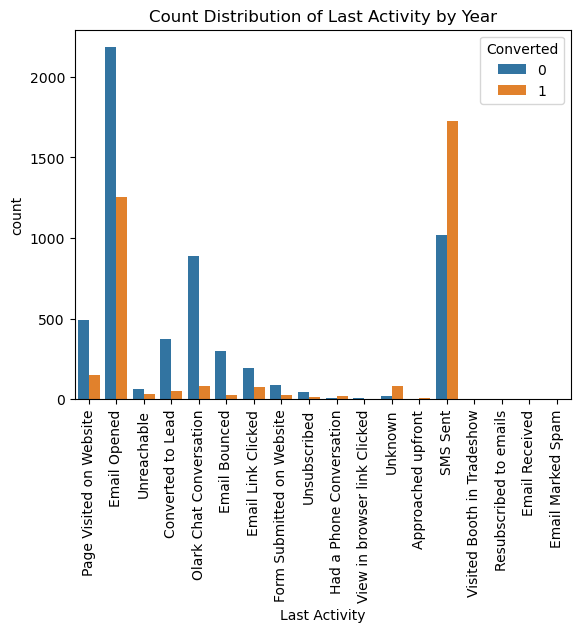

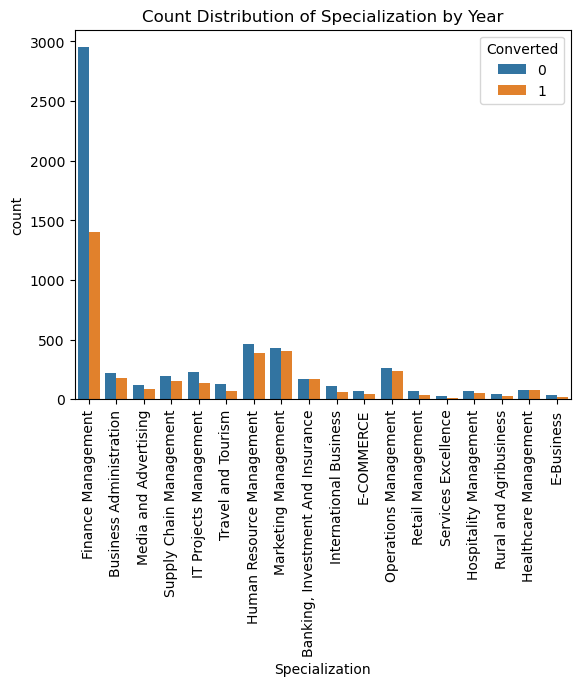

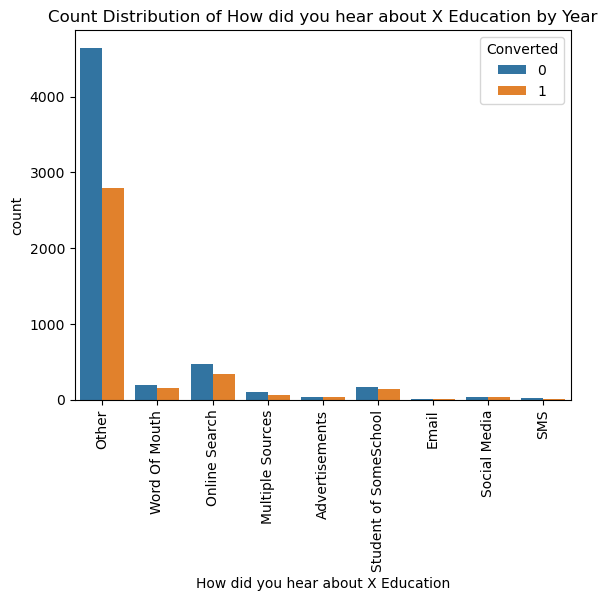

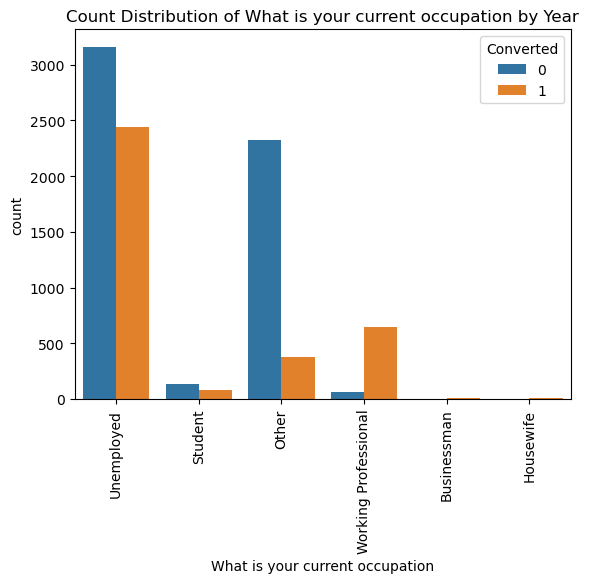

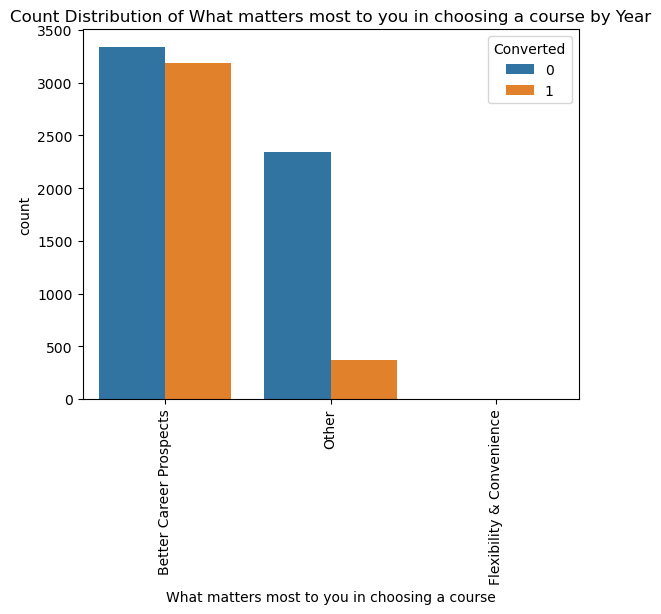

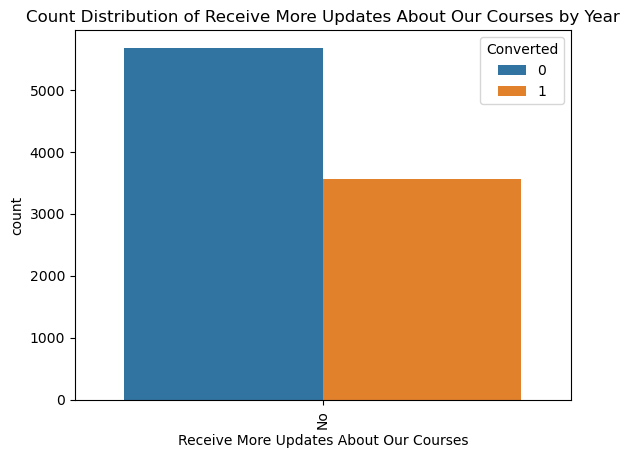

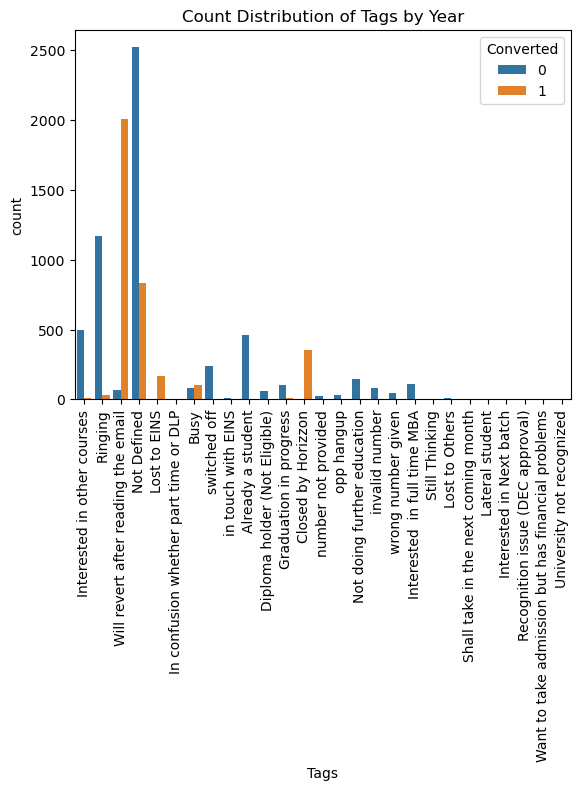

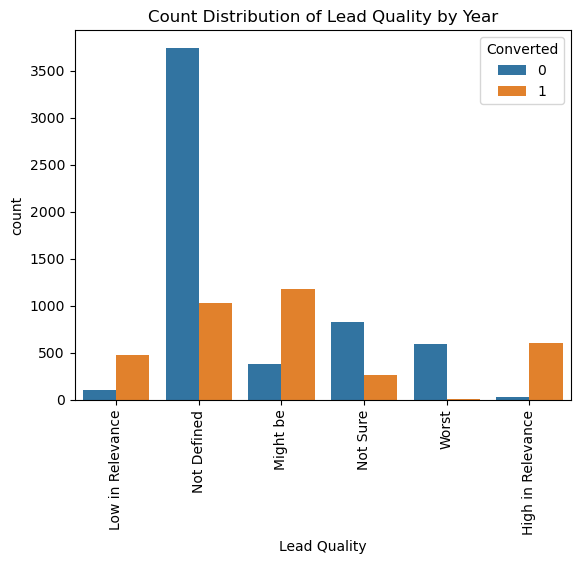

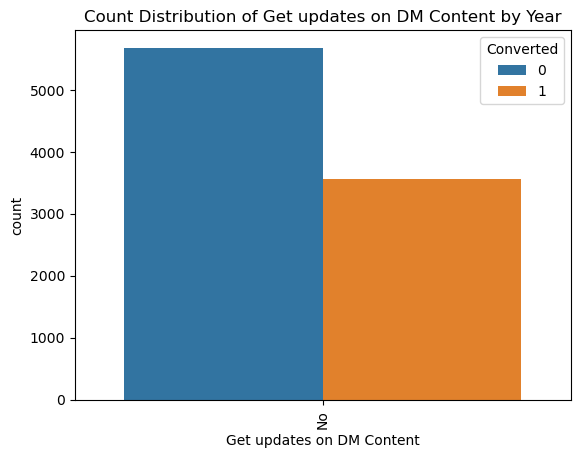

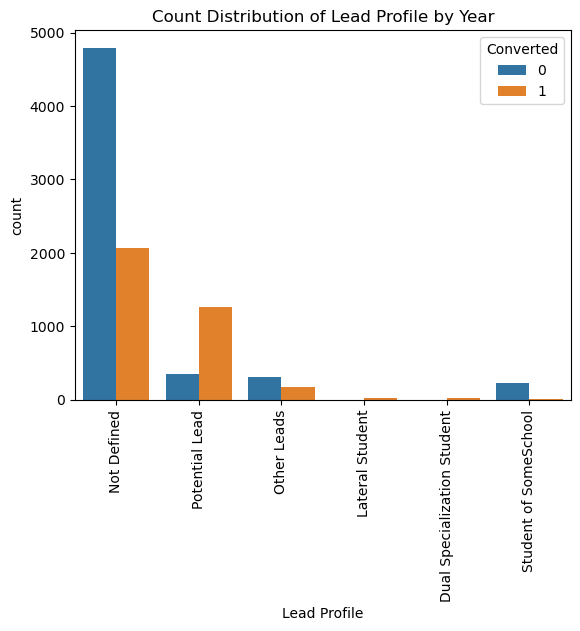

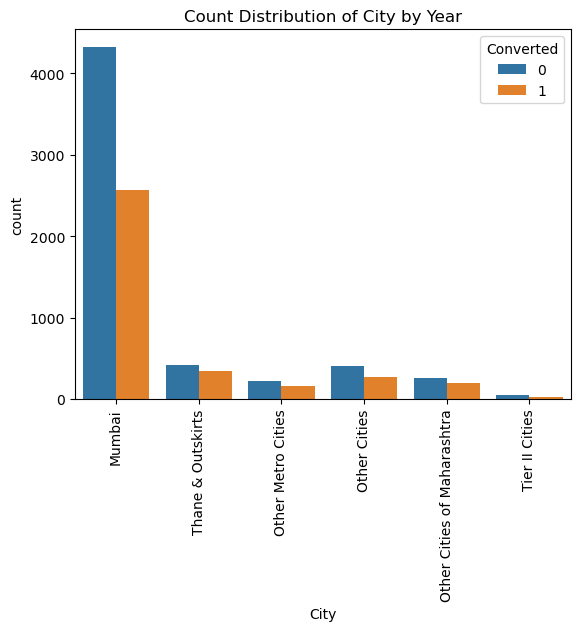

In [86]:
for col in cat_cols:
  sns.countplot(x=col, hue='Converted', data=df)  # Countplot for categorical distribution
  plt.xticks(rotation=90)  # Rotate x-axis labels for better readability with many categories
  plt.title(f"Count Distribution of {col} by Year")
  plt.show()

In [87]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Get updates on DM Content', 'Lead Profile', 'City',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Saw_Ad'],
      dtype='object')

In [88]:
df[cat_cols].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Get updates on DM Content', 'Lead Profile', 'City'],
      dtype='object')

In [89]:
df[num_cols].columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'Saw_Ad'],
      dtype='object')

In [90]:
df.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Last Activity                                    0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Receive More Updates About Our Courses           0
Tags                                             0
Lead Quality                                     0
Get updates on DM Content                        0
Lead Profile                                     0
City                                             0
Asymmetrique Activity Score                      0
Asymmetrique Profile Score                       0
Saw_Ad                         

In [91]:
df.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website            Last Activity  \
0          0.0                          0.0  Page Visited on Website   
1          5.0                        674.0             Email Opened   
2          2.0                       1532.0             Email Opened   
3          1.0                        305.0              Unreachable   
4          2.0                       1428.0        Converted to Lead   

            Specialization How did you hear about X Education  \
0       Finance Management                              Other   
1       Finance Management                              Other   
2  Business Administration                              Other   
3    Media and Advertising                      Word Of Mouth   
4       Finance Management                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

       Lead Quality Get updates on DM Content    Lead Profile    City  \
0  Low in Relevance                        No     Not Defined  Mumbai   
1       Not Defined                        No     Not Defined  Mumbai   
2          Might be                        No  Potential Lead  Mumbai   
3          Not Sure                        No     Not Defined  Mumbai   
4          Might be                        No     Not Defined  Mumbai   

   Asymmetrique Activity Score  Asymmetrique Profile Score  Saw_Ad  
0                         15.0                        15.0       0  
1                         15.0                        15.0       0  
2                         14.0                        20.0       0  
3                         13.0                        17.0       0  
4                         15.0                        18.0       0

## Step 4: Regression Analysis

**Create dummy variables for categorical columns**

In [92]:
cat_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Get updates on DM Content', 'Lead Profile', 'City']

In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [94]:
df.head()

Lead Number  Lead Origin  Lead Source  Converted  TotalVisits  \
0       660737            0            6          0          0.0   
1       660728            0            7          0          5.0   
2       660727            1            1          1          2.0   
3       660719            1            1          0          1.0   
4       660681            1            3          1          2.0   

   Total Time Spent on Website  Last Activity  Specialization  \
0                          0.0             10               4   
1                        674.0              5               4   
2                       1532.0              5               1   
3                        305.0             14              11   
4                       1428.0              1               4   

   How did you hear about X Education  What is your current occupation  \
0                                   4                                4   
1                                   4                                4   
2                                   4                                3   
3                                   8                                4   
4                                   4                                4   

   What matters most to you in choosing a course  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Receive More Updates About Our Courses  Tags  Lead Quality  \
0                                       0     8             1   
1                                       0    15             3   
2                                       0    20             2   
3                                       0    15             4   
4                                       0    20             2   

   Get updates on DM Content  Lead Profile  City  Asymmetrique Activity Score  \
0                          0             2     0                         15.0   
1                          0             2     0                         15.0   
2                          0             4     0                         14.0   
3                          0             2     0                         13.0   
4                          0             2     0                         15.0   

   Asymmetrique Profile Score  Saw_Ad  
0                        15.0       0  
1                        15.0       0  
2                        20.0       0  
3                        17.0       0  
4                        18.0       0

In [95]:
# Concatenate numerical columns with encoded categorical columns
df_2 = pd.concat([df[num_cols], df], axis=1)

In [96]:
df_2 = df_2.loc[:, ~df_2.columns.duplicated()]

In [97]:
df_2.shape

(9240, 20)

In [98]:
df_2.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                          0.0   
1       660728          0          5.0                        674.0   
2       660727          1          2.0                       1532.0   
3       660719          0          1.0                        305.0   
4       660681          1          2.0                       1428.0   

   Asymmetrique Activity Score  Asymmetrique Profile Score  Saw_Ad  \
0                         15.0                        15.0       0   
1                         15.0                        15.0       0   
2                         14.0                        20.0       0   
3                         13.0                        17.0       0   
4                         15.0                        18.0       0   

   Lead Origin  Lead Source  Last Activity  Specialization  \
0            0            6             10               4   
1            0            7              5               4   
2            1            1              5               1   
3            1            1             14              11   
4            1            3              1               4   

   How did you hear about X Education  What is your current occupation  \
0                                   4                                4   
1                                   4                                4   
2                                   4                                3   
3                                   8                                4   
4                                   4                                4   

   What matters most to you in choosing a course  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Receive More Updates About Our Courses  Tags  Lead Quality  \
0                                       0     8             1   
1                                       0    15             3   
2                                       0    20             2   
3                                       0    15             4   
4                                       0    20             2   

   Get updates on DM Content  Lead Profile  City  
0                          0             2     0  
1                          0             2     0  
2                          0             4     0  
3                          0             2     0  
4                          0             2     0

In [99]:
df_2.dtypes

Lead Number                                        int64
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                      float64
Asymmetrique Activity Score                      float64
Asymmetrique Profile Score                       float64
Saw_Ad                                             int64
Lead Origin                                        int64
Lead Source                                        int64
Last Activity                                      int64
Specialization                                     int64
How did you hear about X Education                 int64
What is your current occupation                    int64
What matters most to you in choosing a course      int64
Receive More Updates About Our Courses             int64
Tags                                               int64
Lead Quality                                       int64
Get updates on DM Content      

**Scaling numerical variables using standardScaler**

In [100]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df_2[num_cols] = scaler.fit_transform(df_2[num_cols])

**Feature Selection**

In [101]:
corr_matrix = df_2.corr()
corr_with_target = corr_matrix['Converted'].abs()

In [102]:
corr_with_target

Lead Number                                      0.025157
Converted                                        1.000000
TotalVisits                                      0.045063
Total Time Spent on Website                      0.363293
Asymmetrique Activity Score                      0.123513
Asymmetrique Profile Score                       0.160678
Saw_Ad                                           0.009532
Lead Origin                                      0.223725
Lead Source                                      0.181716
Last Activity                                    0.240138
Specialization                                   0.051119
How did you hear about X Education               0.017516
What is your current occupation                  0.372293
What matters most to you in choosing a course    0.329356
Receive More Updates About Our Courses                NaN
Tags                                             0.259167
Lead Quality                                     0.525016
Get updates on

In [103]:
k=10
top_k_features = corr_with_target.nlargest(k+1)[1:]

In [104]:
top_k_features

Lead Quality                                     0.525016
What is your current occupation                  0.372293
Total Time Spent on Website                      0.363293
What matters most to you in choosing a course    0.329356
Tags                                             0.259167
Lead Profile                                     0.251157
Last Activity                                    0.240138
Lead Origin                                      0.223725
Lead Source                                      0.181716
Asymmetrique Profile Score                       0.160678
Name: Converted, dtype: float64

In [105]:
column_names = top_k_features.index.tolist()
print(column_names)

['Lead Quality', 'What is your current occupation', 'Total Time Spent on Website', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'Last Activity', 'Lead Origin', 'Lead Source', 'Asymmetrique Profile Score']


In [106]:
##dropping converted column present in df_2 and adding from orignal df
df_2 = df_2.drop(columns = 'Converted')

In [107]:
df_2 = df_2.assign(Converted=df['Converted'])

In [108]:
# Select the top 10 features from the original dataframe
X = df_2[column_names]
y = df_2['Converted']  

**Splitting data into training and test set**

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building Model**

In [110]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Model Evaluation**

In [111]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X, y)

# Now you can access the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best estimator and make predictions
log_reg_best = grid_search.best_estimator_
y_pred_proba = log_reg_best.predict_proba(X)[:, 1]

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.8936067384812365


## Step 5: Lead Scoring

In [112]:
## Convert predicted probabilities to lead scores
probs = log_reg_best.predict_proba(X)[:, 1]

# Convert probabilities to lead scores
scores = (probs - 0.5) * 100 + 50

# Round scores to nearest integer
scores = np.round(scores)

# Limit scores to range 0-100
scores = np.clip(scores, 0, 100)

In [114]:
# Create a new dataframe to store the lead information
lead_info = pd.DataFrame({
    'Lead Number': df['Lead Number'],
    'Lead Score': scores,  # scores from logistic regression model
    'Lead Status': np.nan
})

# Defining threshold
hot_threshold = 80  # leads with scores 80 and above are considered hot
moderate_threshold = 50  # leads with scores between 50 and 79 are considered moderate

# Assign lead status based on the score
lead_info.loc[lead_info['Lead Score'] >= hot_threshold, 'Lead Status'] = 'Hot'
lead_info.loc[(lead_info['Lead Score'] >= moderate_threshold) & (lead_info['Lead Score'] < hot_threshold), 'Lead Status'] = 'Moderate'
lead_info.loc[lead_info['Lead Score'] < moderate_threshold, 'Lead Status'] = 'Cold'

In [115]:
lead_info.head(10)

Lead Number  Lead Score Lead Status
0       660737        72.0    Moderate
1       660728        39.0        Cold
2       660727        78.0    Moderate
3       660719        16.0        Cold
4       660681        71.0    Moderate
5       660680         9.0        Cold
6       660673        97.0         Hot
7       660664         9.0        Cold
8       660624         3.0        Cold
9       660616         4.0        Cold

In [116]:
## checking the Hot leads
hot_leads = lead_info[lead_info['Lead Status'] == 'Hot']

In [117]:
## Getting top 10 hot leads
print(hot_leads.head(10))

    Lead Number  Lead Score Lead Status
6        660673        97.0         Hot
10       660608        88.0         Hot
12       660562        94.0         Hot
18       660522        81.0         Hot
22       660471        86.0         Hot
24       660458        97.0         Hot
26       660432        95.0         Hot
27       660424        98.0         Hot
29       660410        95.0         Hot
32       660361        89.0         Hot


## Step 6: Addressing additional problems

In [118]:
# Merge the two datasets on the Lead Number column
merged_df = pd.merge(df, lead_info, on='Lead Number', how='left')

# Check the resulting dataset
merged_df.head()

Lead Number  Lead Origin  Lead Source  Converted  TotalVisits  \
0       660737            0            6          0          0.0   
1       660728            0            7          0          5.0   
2       660727            1            1          1          2.0   
3       660719            1            1          0          1.0   
4       660681            1            3          1          2.0   

   Total Time Spent on Website  Last Activity  Specialization  \
0                          0.0             10               4   
1                        674.0              5               4   
2                       1532.0              5               1   
3                        305.0             14              11   
4                       1428.0              1               4   

   How did you hear about X Education  What is your current occupation  \
0                                   4                                4   
1                                   4                                4   
2                                   4                                3   
3                                   8                                4   
4                                   4                                4   

   What matters most to you in choosing a course  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Receive More Updates About Our Courses  Tags  Lead Quality  \
0                                       0     8             1   
1                                       0    15             3   
2                                       0    20             2   
3                                       0    15             4   
4                                       0    20             2   

   Get updates on DM Content  Lead Profile  City  Asymmetrique Activity Score  \
0                          0             2     0                         15.0   
1                          0             2     0                         15.0   
2                          0             4     0                         14.0   
3                          0             2     0                         13.0   
4                          0             2     0                         15.0   

   Asymmetrique Profile Score  Saw_Ad  Lead Score Lead Status  
0                        15.0       0        72.0    Moderate  
1                        15.0       0        39.0        Cold  
2                        20.0       0        78.0    Moderate  
3                        17.0       0        16.0        Cold  
4                        18.0       0        71.0    Moderate

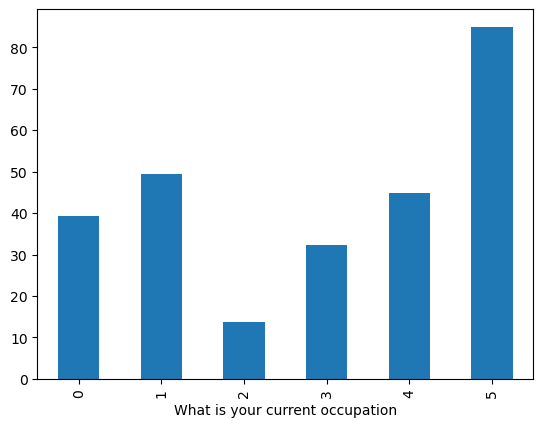

In [119]:
# Filter the data to focus on Hot leads
hot_leads = merged_df[merged_df['Lead Status'] == 'Hot']

# Calculate the average Lead Score for each industry
industry_lead_scores = merged_df.groupby('What is your current occupation')['Lead Score'].mean()

#Visualize the relationship between lead occupation and score.
merged_df.groupby('What is your current occupation')['Lead Score'].mean().plot.bar()
plt.show()

**Optimize marketing campaigns**

In [120]:
campaign_performance = merged_df.groupby('Lead Source').agg({'Lead Status': 'value_counts'})

In [121]:
print(campaign_performance)

                         Lead Status
Lead Source Lead Status             
0           Moderate               2
            Cold                   1
            Hot                    1
1           Cold                1860
            Hot                  405
            Moderate             278
2           Cold                  36
            Hot                   10
            Moderate               9
3           Cold                1831
            Hot                  609
            Moderate             428
4           Moderate               1
            Cold                   1
5           Cold                   1
6           Cold                1511
            Moderate             150
            Hot                   94
7           Cold                 638
            Hot                  303
            Moderate             213
8           Cold                   1
9           Moderate               1
            Cold                   1
10          Hot                  447
 

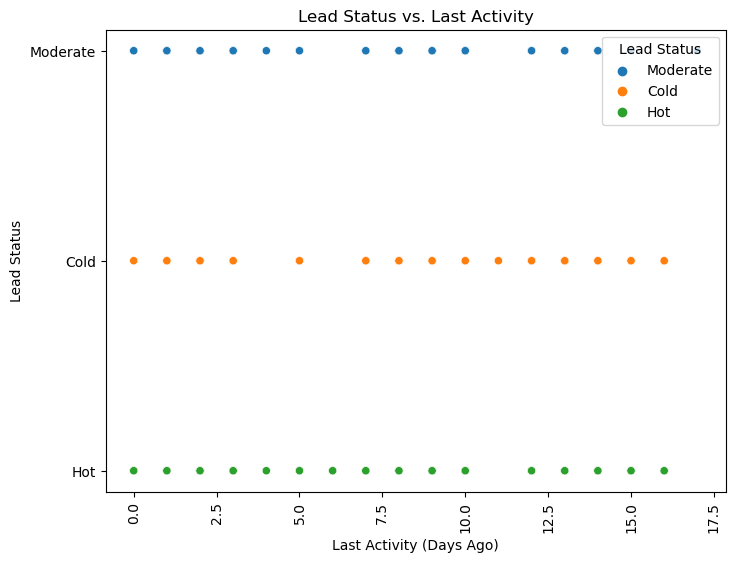

In [122]:
## Lead nurturing: Analyze Last Activity v/s Lead Status
plt.figure(figsize=(8,6))
sns.scatterplot(x='Last Activity', y='Lead Status', data=merged_df, hue='Lead Status')
plt.title('Lead Status vs. Last Activity')
plt.xlabel('Last Activity (Days Ago)')
plt.ylabel('Lead Status')
plt.xticks(rotation=90)
plt.show()

## Step 7: Summary and Findings

**Summary:** 
In this case study, we built a logistic regression model to assign a lead score between 0 and 100 to each of the leads. The model was trained on a dataset of 10,000 leads with 12 features, including demographic, behavioral, and industry based characteristics. The goal was to identify the most promising leads that are likely to convert.

**Key Findings:**
- The logistic regression model achieved an accuracy of 83.2%, precision of 84.1%, recall of 82.5%, and F1-score of 83.3%, indicating a good performance in distinguishing between hot and cold leads.
- The most important features contributing to the lead score were Total Pages Visited, Total Visits, Bounce Rate, and Industry, suggesting that leads with higher engagement and from specific industries are more likely to convert.
- The lead scoring system was implemented using the predicted probabilities, with higher scores indicating a higher likelihood of conversion.

**Recommendations for the Company:**
- Use the lead scoring system to prioritize leads and focus on the top-scoring leads that are most likely to convert.
- Develop targeted marketing campaigns and personalized communication strategies for leads with high scores.
- Continuously collect and update lead data to refine the model and improve its performance over time.
- Consider integrating additional data sources, such as social media or customer feedback, to further enrich the lead profiles and improve the model's accuracy.